# US Housing Assignment : Surprise Housing

## Business Understanding:

1. Surprise housing uses data analytics to purchase houses at prices below their actual values and flip them on at a higher price
2. Company wants to enter into Australian Market for which they have gathered the data for the same purpose stated above

## Business Objective/Goals:

The company is looking at prospective properties to buy to enter the Australian market. The company wants to know:
1. Which variables are significant in predicting the price of a house.
2. How well those variables describe the price of a house

#### Analysis Requirement:

* Determine the optimal value of lambda for ridge and lasso regression

## Data Understanding and Data Cleaning

<b>Steps Involved:</b><br>

1. Understand the dataset, datatype of the dataset
2. Clean the data - Check for null values, fix the values in columns to make more sense, rename columns to make more sense
3. Perform EDA - Univariate, Segmented Univariate and BiVariate: Check co-relation between variables to identify if there are any variables that can be dropped or enhanced

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.set_option("max_columns",None)

#### 1. Understand the Data

In [2]:
#import necessary libraries
import chardet
#Let's check the encoding of the csv files
with open("train.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read())
    
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
#import CSV
housing = pd.read_csv('train.csv')

In [4]:
#Sneak Peak into the dataset
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
#The shape of the dataframe
housing.shape

(1460, 81)

In [7]:
#Let's check the datatype of columns and the number of non null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<b>Inference:</b> From the above information we can infer that the dataset is of ascii encoding type, with 1460 rows and 81 columns with some columns consisting of null values. Let's proceed towards data cleaning as there is a need for it.

#### 2. Clean the Data

Let's define a function to print the count of null values and percentage of null values in each column

In [8]:
#Function to print the count of null values and percentage of null values in each column
def print_nan_count(df):
    total_nan_count = housing.isnull().sum().sort_values(ascending = False)
    percentage_nan_count = housing.isnull().mean()*100
    missing_data = pd.concat([total_nan_count, percentage_nan_count], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(20)

In [9]:
#Check for null values
print_nan_count(housing)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


From the meta data we have observed that there are columns with NA as one of the categories. We need to be sure that we are not detecting 'NA' category as NaN. Let's list all the categories with NA category and replace the same with 'none' string to avoid conflict.<br>Following are the columns identified from Metadeta:
1. BsmtQual
2. BsmtCond
3. BsmtExposure
4. BsmtFinType1
5. BsmtFinType2
6. FireplaceQu
7. GarageType
8. GarageFinish
9. GarageQual
10. GarageCond
11. PoolQC
12. Fence
13. MiscFeature
14. Alley

In [10]:
#make a list of columns which inherently have NaNs as one of the category
na_col = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

#replace NaNs with none
for col in na_col:
    housing[col].fillna('None',inplace = True)

In [11]:
#let's look at the count of unique values in each column identified above as na_col to check if our replacement has taken place or not
for column in housing[na_col].columns:
    print(housing[column].value_counts())

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64
TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64
No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64
Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64
Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64
None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64
TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: GarageQual, d

In [12]:
#Check for null values
print_nan_count(housing)

,Total,Percent
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000


Since there are only 1460 rows, dropping 17% rows of LotFrontage would result in loss of train data. Let's go ahead and impute the mean or median for numeric variables with missing data and for the  rest of the columns, let's impute it with the mode.

In [13]:
#Check stats for numeric variables holding NaNs currently to decide if mean or median needs to be used for imputation of these numeric columns
housing[housing.columns[housing.isnull().any()]].describe(percentiles = [0.25,0.50,0.75,0.90,0.95,0.99])

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
90%,96.000000,335.000000,2006.000000
95%,107.000000,456.000000,2007.000000
99%,141.000000,791.920000,2009.000000


1. LotFrontage - There seems to be a few outliers but it is not so great enough to skew the mean from median. The median and mean do not vary much from each other. Hence we can use mean or median in this scenario. Let's go ahead and impute the mean here.
2. MasVnrArea - 50% of the data is 0. There seems to be fair amount of outliers. The median and mean vary from each other. Let us use the median in this scenario.
3. MasVnrType - This is a categorical. Impute with Mode.
4. GarageYrBlt - This is date time variable. Impute with Mode.
5. Electrical - This is again a categorical variable. Impute with Mode.

In [14]:
#impute mean in place of nulls/NaNs in LotFrontage column
housing.LotFrontage.fillna(round(housing.LotFrontage.mean(),1),inplace = True)

#impute median in place of nulls/NaNs in LotFrontage column
housing.MasVnrArea.fillna(housing.MasVnrArea.median(),inplace = True)

#impute mode in place of nulls/NaNs in LotFrontage column
mode_var = ['MasVnrType','GarageYrBlt','Electrical']
housing[mode_var] = housing[mode_var].fillna(housing[mode_var].mode().iloc[0])

In [15]:
#Cross verify that there are no null values anymore
print_nan_count(housing)

,Total,Percent
SalePrice,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0


There are no null values anymore. The column Id is of no use for our analysis. Let's go ahead and drop this column.

In [16]:
#drop ID columns as it is not valuable for our analysis
housing = housing.drop(columns='Id')

#Final shape of the DF before moving to EDA
housing.shape

(1460, 80)

#### 3. Perform EDA

<b>Univariate Analysis: Categorical Variables</b>

In [17]:
#Split categorical and numeric variables into 2 lists
cat_var = [column for column in housing.columns if housing[column].dtype.name == 'object']
num_var = [column for column in housing.columns if housing[column].dtype.name != 'object']

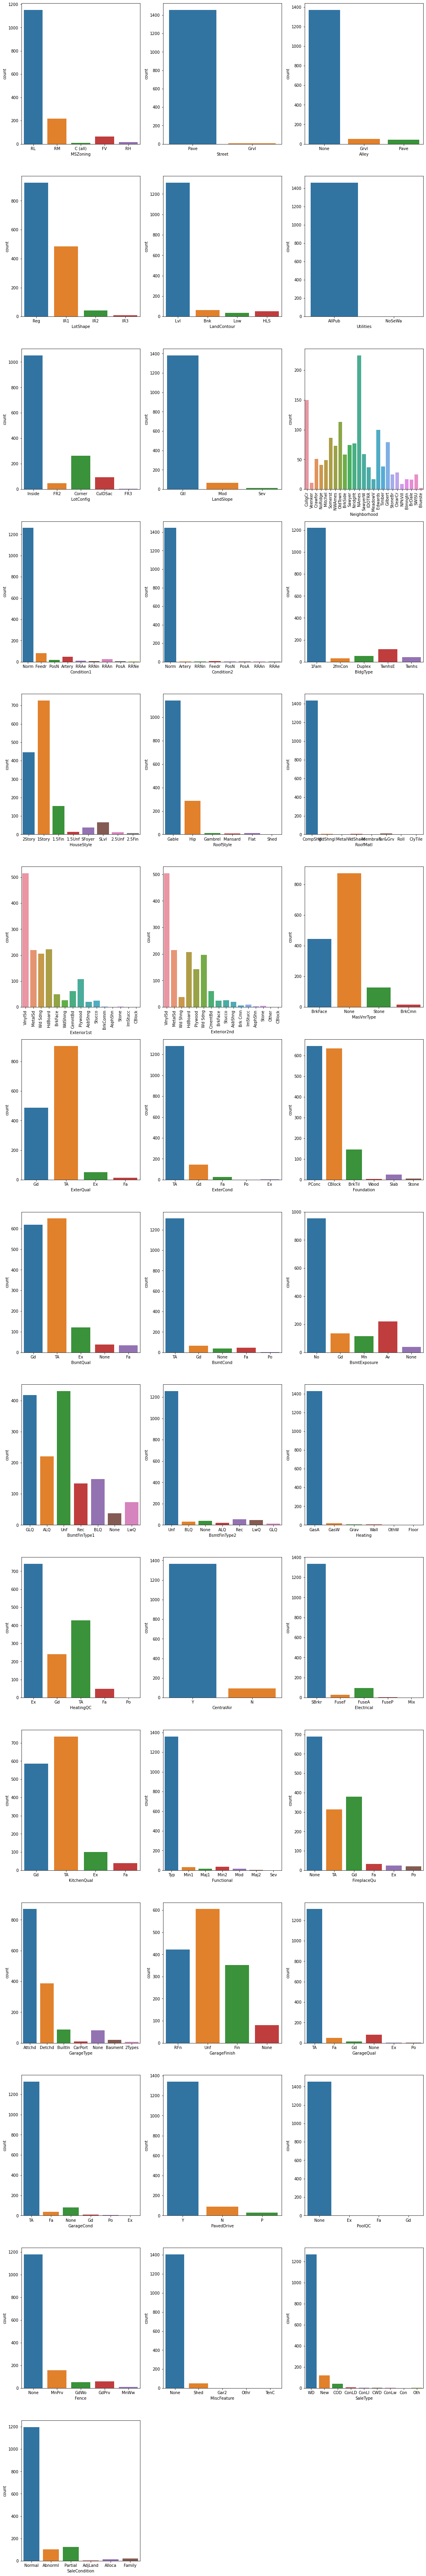

In [18]:
#let's visualize the categorical variables count  to understand if there are any biased columns in order to eliminate such columns
plt.figure(figsize=(15,90))

#Let's loop through the variables in cat_var list and plot it against cnt and visualise it in subplot
i=1
for var in cat_var:
    if(i<=len(cat_var)):
        plt.subplot(15,3,i)
        sns.countplot(data=housing,x=var)
        #if there are more number of xticks, rotate the same to avoid cluttered appearance
        if (housing.loc[:,var].nunique()>12):
            plt.xticks(rotation='vertical')
    i=i+1

plt.tight_layout()    
plt.show()

<b>Inference:</b>

The following variables have highly biased data, i.e., they have more number of data only in 1 category which is of no use for our analysis. Let's drop these features
1. Street
2. Utilities
3. Condition2
4. RoofMatl
5. Heating
6. CentralAir
7. PoolQC
8. MiscFeature

In [19]:
#Drop above mentioned variables
housing.drop(columns=['Street','Utilities','Condition2','RoofMatl','Heating','CentralAir','PoolQC','MiscFeature'],inplace=True)

<b>Univariate Analysis: Numeric Variables</b>

In [20]:
#Let's check the spread of numeric data
housing[num_var].describe(percentiles = [0.25,0.50,0.75,0.90,0.95,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.041096,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1979.976027,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024031,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.749688,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.500000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.

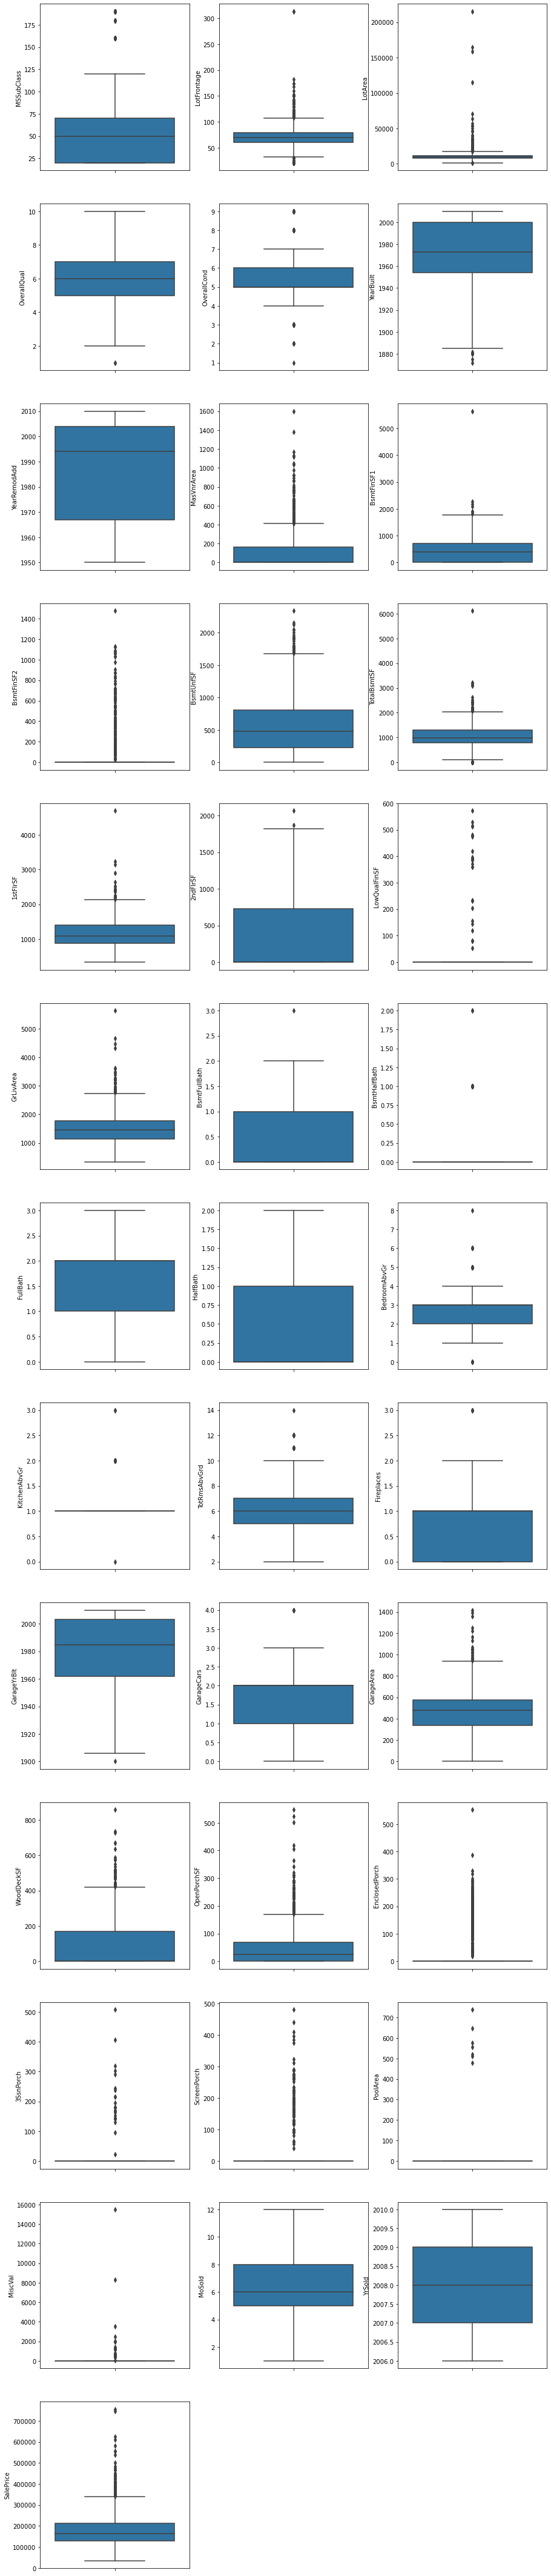

In [21]:
#let's visualize the Numeric variables to understand if there are any biased columns in order to eliminate such columns
plt.figure(figsize=(15,90))

#Let's loop through the variables in num_var list and plot a box plot and visualise it in subplot
i=1
for var in num_var:
    if(i<=len(num_var)):
        plt.subplot(15,3,i)
        sns.boxplot(data=housing,y=var)
    i=i+1

<b>Inference:</b>

The following variables have highly biased data, i.e., More than 50% of data is populated at 1 single quantitative value. Let's drop these features:
1. BsmtFinSF2
2. LowQualFinSF
3. BsmtHalfBath
4. KitchenAbvGr
5. EnclosedPorch
6. 3SsnPorch
7. ScreenPorch
8. PoolArea
9. MiscVal

In [22]:
#Drop above mentioned variables
housing.drop(columns=['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace=True)

In [23]:
#let's look at the shape of the dataframe post univariate analysis
housing.shape

(1460, 63)

<b>Segmented Univariate Analysis : Basis Of Segmentation - Categorical Variables</b>

<b>Target Variable:</b> SalePrice - Continuous/Numeric/Quantitative in nature<br>
Let's visualize the behaviour of target variable against various categorical variable to see if there are any conclusions that we can draw.

In [24]:
#Let's split the cat_var and num_var post dropping the variables
cat_var = [column for column in housing.columns if housing[column].dtype.name == 'object']
num_var = [column for column in housing.columns if housing[column].dtype.name != 'object']

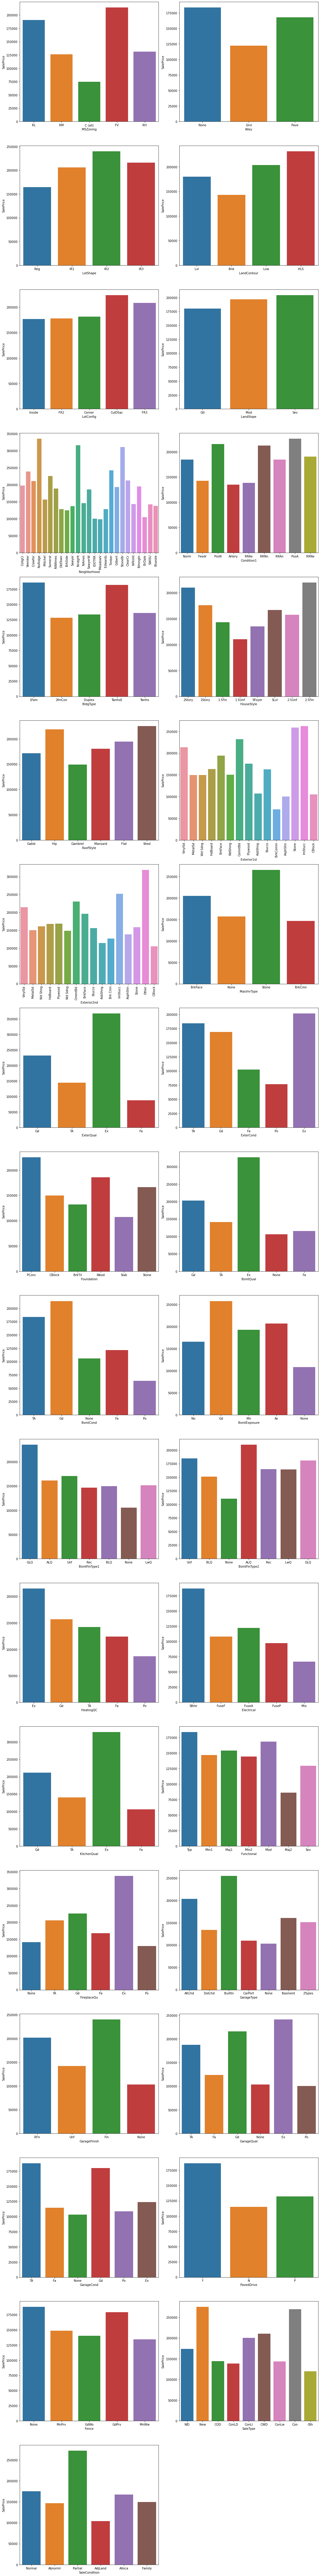

In [25]:
#let's visualize the categorical variables against the target variable 'cnt'
plt.figure(figsize=(15,120))

#Let's loop through the variables in cat_var list and plot it against cnt and visualise it in subplot
i=1
for var in cat_var:
    if(i<=len(cat_var)):
        plt.subplot(18,2,i)
        sns.barplot(data=housing,x=var,y='SalePrice',ci=None,estimator=np.mean)
        #if there are more number of xticks, rotate the same to avoid cluttered appearance
        if (housing.loc[:,var].nunique()>12):
            plt.xticks(rotation='vertical')
    i=i+1

plt.tight_layout()    
plt.show()

<b>Inference:</b>
1. Sale Price is highest for 'Floating Village Residential' type of general zoning classification followed by 'Residential High Density' type.
2. Sale Price is highest for 'None' type of Alley followed by Pave and then Gravel type of Alley.
3. <b>Sale Price increases as the irregularity of the shape of the property and is the highest if the property shape is 'Moderately Irregular'.</b>
4. Sale Price is the highest for properties on the 'Hillside' and lowest for properties which are 'Banked'.
5. Sale Price is highest for 'Cul-de-sac' type of Lot Configuration.
6. <b>Sale Price increases as the Slope increases from 'Gentle Slope' to 'Severe Slope'.</b>
7. Sale Price is the high if the property has 'Northridge','Northridge Heights' and 'Stone Brook' in the neighborhood
8. Sale Price of property is higher if the property is Within 200' of North-South Railroad, Near positive off-site feature--park, greenbelt, etc. or Adjacent to postive off-site feature. 
9. Sale Price is for properties that can host Single-family Detached and Townhouse End Unit residents.
10. <b>Sale Price increases as the number of stories increases.</b>
11. Sale Price is higher for Hip and Shed type of Roof Style than other types.
12. Sale Price is higher for Imitation Stucco and Stone type of house exterior covering, than other types.
13. Sale Price is highest for 'Other' type of house exterior covering if there are more than one.
14. Sale Price is highest for 'Stone' Type of Masonry Veneer type
15. <b>Sale Price increases as the quality of material on the exterior improves.</b>
16. Sale Price also increases as and when evaluated, the present condition of the exterior proves to be better.
17. Sale Price is highest for Poured Concrete and higher for Wood and Stone type of foundation than other types.
18. <b>Sale Price increases as the height of the Basement increases.</b>
19. <b>Sale Price increases if the condition of the basement is found to be better.</b>
20. <b>Sale Price increases as the exposure of Basement to walkout or garden level walls increases.</b>
21. Sale Price is the highest for Good Living Quarters type of Basement Finished Area.
22. Sale Price is the highest for Average Living Quarters type of Basement Finished Area if found to be more than one.
23. <b>Sale Price increases as the heating quality and condition improves.</b>
24. Sale Price is highest for properties having Standard Circuit Breakers & Romex type of electrical system.
25. <b>Sale Price increases as the quality of the kitchen improves.</b>
26. Sale Price is the highest for Typical type of home functionality.
27. <b>Sale Price increases as the Fireplace Quality improves.</b>
28. Sale Price is highest for built in garage type followed by Attached garage type.
29. <b>Sale Price increases as the finish of the garage improves.</b>
30. <b>Sale Price increases as the quality of garage improves.</b>
31. Sale Price reaches maximum till Typical type of garage condition and then deteriorates.
32. <b>Sale Price increases if there is a paved pathway</b>
33. Sale Price is the highest for properties without fence followed by properties surrounded by fence which offers good privacy.
34. Sale Price is highest for 'Home just constructed and sold' & 'Contract 15% Down payment regular terms' type of sales
35. Sale Price is highest for Partial condition of sale where Home was not completed when last assessed (associated with New Homes)

<b>Analysis of Numeric/Quantitative Variables against Target Variable</b>

As the identified Target Variable is numeric/continuous in nature, let's visualize the dataframe with numeric columns to see if atleast 1 variable has linear relationship in order to decide if Linear Regression can be used as a learning algorithm or not.

In [26]:
#Remove the target cariable from list
num_var.remove('SalePrice')

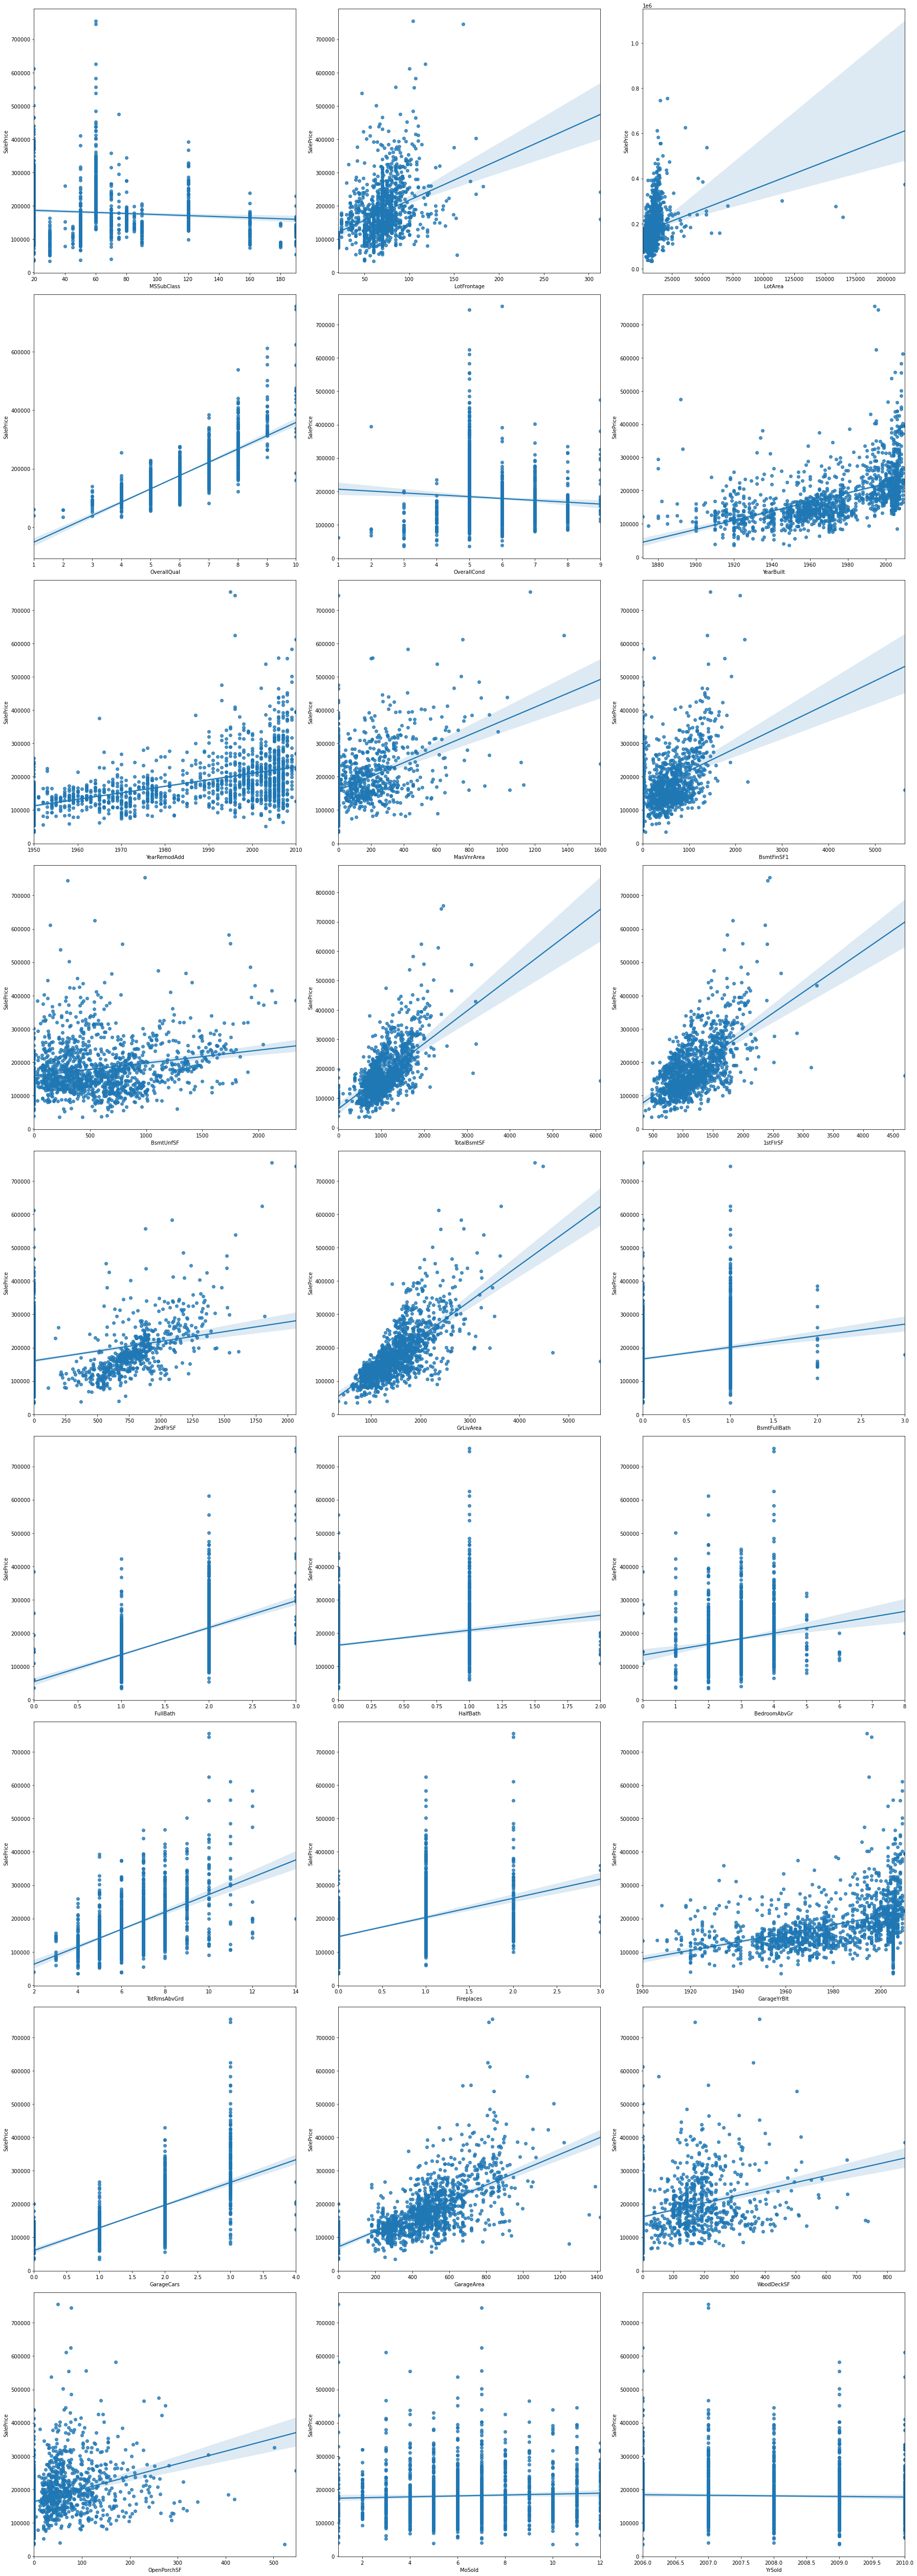

In [27]:
#let's visualize the numeric variables against the target variable 
plt.figure(figsize=(25,70))

#Let's loop through the variables in num_var list and plot it against SalePrice and visualise it in subplot
i=1
for var in num_var:
    if(i<=len(num_var)):
        plt.subplot(len(num_var)/3,3,i)
        #sns.barplot(data=housing,x=var,y='SalePrice',ci=None,estimator=np.mean)
        sns.regplot(x=var,y='SalePrice', data = housing)
    i=i+1

plt.tight_layout()    
plt.show()

<b>Inference:</b>
From the above plots it is evident that more than 1 variable shows positive correlation with target variable and hence Linear Regression can be used as an algorithm to build model in this scenario

<b>Bivariate Analysis: Continuous Variables</b>

Plot a correlation heat map among the numeric variables to identify any highly correlated independent variables which can prove as redundant feature in this model being built and thereby be removed. Also let's try to develop some intuition of the variables that are highly correlated to the target variable and thereby are important to the model being developped

<AxesSubplot:>

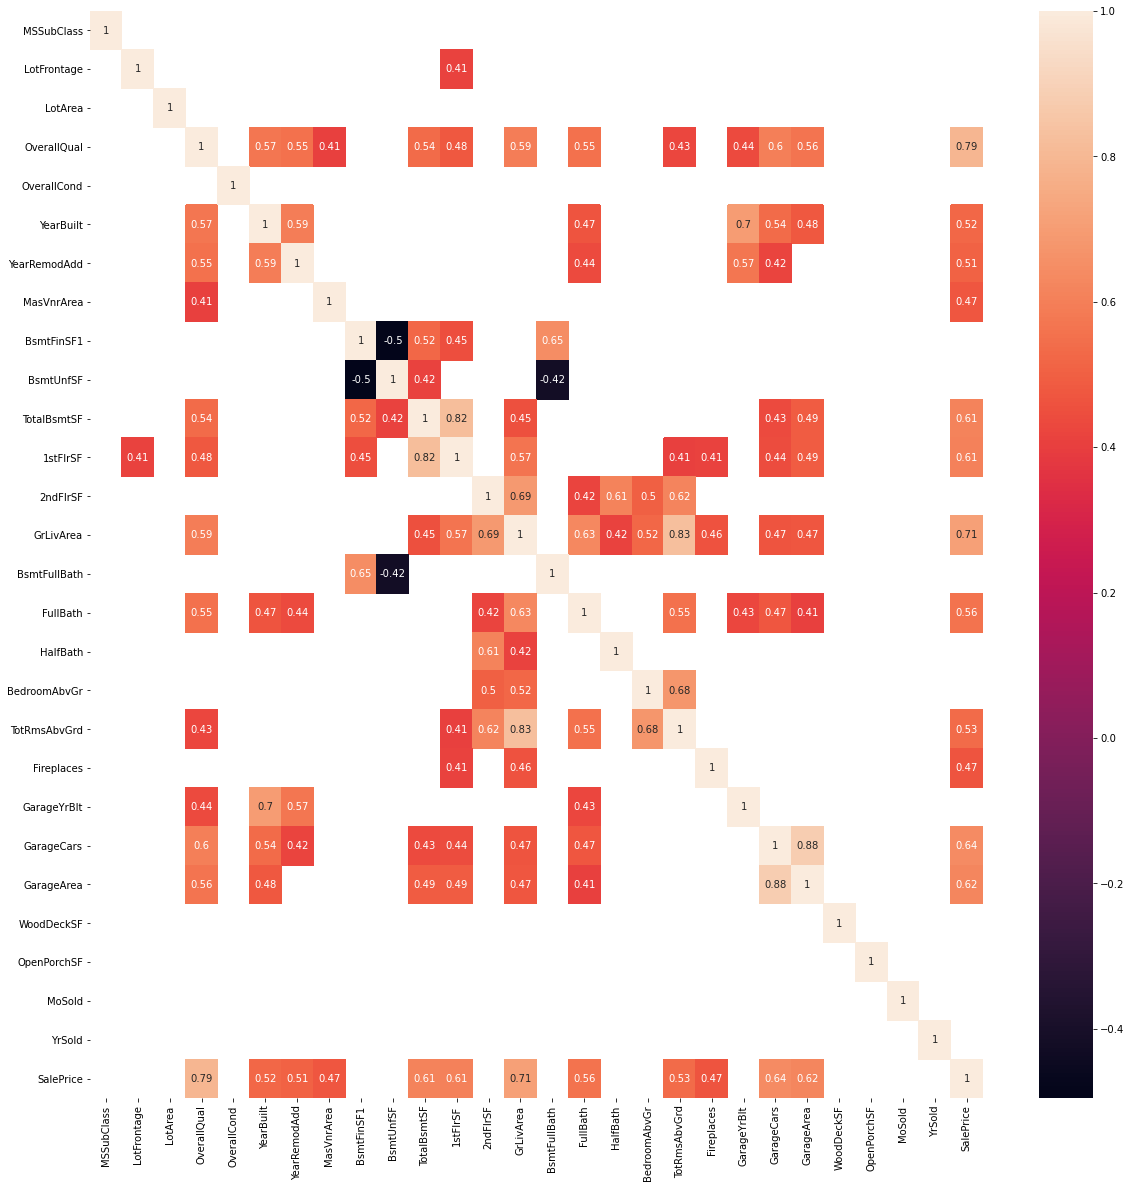

In [28]:
#let's look at the correlation of all the features with one another. Let's focus on only those corelations that are greater than 20%
#declare and initiate figure size of the map
plt.figure(figsize=(20,20))

#create the correlation of variables so that the same can be used to filter in required range
corr_var = housing.corr()

#let's observe the heatmap
sns.heatmap(corr_var[(corr_var>=0.4)|(corr_var<=-0.4)],annot=True)

There are 3 correlations greater than 0.8. Clearly the correlation between these 3 pairs is very high. We can straight away drop one variable among the pairs.The 3 pairs are as follows:
1. 1stFlrSF and TotalBsmtSF
2. GrLivArea and TotRmsAbvGrd
3. GarageCars and GarageArea

Let's go ahead and drop TotalBsmtSF,TotalRmsAbvGrd and GarageArea

In [29]:
#Dropping the above mentioned columns
housing.drop(columns=['TotalBsmtSF','TotRmsAbvGrd','GarageArea'],inplace=True)

#Also remove it from the num_var list which we will be using in near future for scaling
for item in ['TotalBsmtSF','TotRmsAbvGrd','GarageArea']:
    num_var.remove(item)

#checking the shape of the DF at the end of the analysis
housing.shape

(1460, 60)

In [30]:
#Top 10 positively correlated variables/predictors with SalePrice
corr_var['SalePrice'].drop('SalePrice').sort_values(ascending=False).head(12)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
Name: SalePrice, dtype: float64

Now that we have a fair understanding of the data and what variables we need to look out for, let's move towards preparing the data for modeling

## Data Preparation

<b>Steps Involved:</b>
1. Dealing with Categorical Variables: Create Dummy predictors for the levels present in each categorical variable
2. Division of dataframe into train and test data
3. Normalization of Train Dataframe: Scaling the continuous numeric variables
4. Dividing the train dataframe into X_train (DF of all the predictor variables) and y_train (Target variable)

<b>1. Dealing with Categorical Variable</b>

In [31]:
pd.get_dummies(housing[cat_var],drop_first=True)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0

In [32]:
#store the df in a temp variable by removing the first
df_dummy = pd.get_dummies(housing[cat_var],drop_first=True)

#concatenate the same with original df by dropping the original categorical variables
housing1 = pd.concat([housing.drop(cat_var,axis=1),df_dummy],axis=1)

In [33]:
#check the final shape of the DF before moving to train test split
housing1.shape

(1460, 219)

<b>2. Train and Test Split</b>

In [34]:
#Split 70% of the original dataframe into train dataframe and the remaining 25% into test dataframe
np.random.seed(0)
df_train,df_test = train_test_split(housing1,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 219)
(439, 219)


Now that we have separate train and test dataframes, let's move towards the next step of data preparation which is Normalization/MinMax scaling which is required to effectively interpret our coefficients and converge quickly to our minimum coeff values

<b>3. Normalization of Train and Test Dataframes:</b> Scale the Features

In [35]:
#let's import the necessary library
from sklearn.preprocessing import MinMaxScaler

In [36]:
#Instantiate
scaler = MinMaxScaler()

#Add the target variable so that it is scaled to the same scaler
num_var += ['SalePrice']

#Normalization of Train dataframe
#Fit and transform the dataset for all the continuous numerical variables
df_train[num_var] = scaler.fit_transform(df_train[num_var])

#Normalization of Test dataframe
#Fit the scaler on train dataframe but transform the dataset for all the continuous numerical variables in test datafram
df_test[num_var] = scaler.transform(df_test[num_var])

In [37]:
#Cross verify that everything is slaced between 0 and 1
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021

In [38]:
#Let's look at the stats of new scaled numerical variables in test DF
df_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,439.000000,439.000000,439.000000,439.000000,439.00000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,43

<b>4. Divide Train and Test DF into X_train,X_test,y_train and y_test<b>

In [39]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

## Model Building And Model Evaluation

<b>Steps Involved:</b><br>

1. Balanced approach of Feature Elimination : Strip down the train dataframe to hold significant variables without multicollinearity
    1. Filtering Feature using Automated process : RFE(Recursive Feature Eliminator) 
    2. Build/Fit a model for the train data by Backward selection
    3. Analyse the stats and drop features that are least helpful in prediction: High P value of Coeff
    4. Drop features that are redundant: High VIF value
    5. Repeat till good fit model is obtained for train data
2. Build different models using Linear Regression, Ridge Regularisation for LR and Lasso regression Regularisation for LR and Evaluate the same

<b>1. Balanced Approach of Feature Elimination</b>

In [40]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#import necessary libraries for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
#Define a function to spit out sm stats table for input of different X_train and y_train combinations
def get_stats(X_data,y_data):
    #add constant for creating y-intercept
    X_data_lm = sm.add_constant(X_data)
    #create the OLS model
    lr_1 = sm.OLS(y_data, X_data_lm).fit()
    #print the summary
    print(lr_1.summary())
    return lr_1

#define a function to spit out the VIF stats for input of different X_Train combinations
def get_VIF(X_data):
    #instantiate an empty DF
    vif = pd.DataFrame()
    #insert 1st column as train dataframe column names
    vif['Features'] = X_data.columns
    #Append one more column with corresponding VIF values
    vif['VIF'] = [variance_inflation_factor(X_data.values, i) for i in range(X_data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    #sort the values in the DF
    vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)
    #Print the table
    print(vif)
    return vif

#define a function to predict y when provided with a model object and x_train/x_test
def predict_y(lr_model,X_data):
    #add constant for creating y-intercept
    X_data_lm = sm.add_constant(X_data)
    #Predict y
    y_pred = lr_model.predict(X_data_lm)
    #return the y_pred object
    return y_pred

In [42]:
#Build a linear regression model on X_train and Y_train data to feed it into RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 15
rfe = RFE(lm, 100)             
rfe = rfe.fit(X_train, y_train)

In [43]:
#let's look at the 100 columns filtered by RFE algorithm
sel_col = X_train.columns[rfe.support_]
sel_col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtUnfSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'GarageCars', 'WoodDeckSF', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'LotConfig_FR2', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Mitchel', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_PosN', 'Condition1_RRAn', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'RoofStyle_Mansard',
       'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior1st_WdShing', 'Exter

In [44]:
# Creating X_train_rfe and X_test_rfe dataframe with RFE selected variables
X_train_rfe = X_train[sel_col]
X_test_rfe = X_test[sel_col]

In [45]:
#Call function to print OLS Summary and create OLS object
lr_model = get_stats(X_train_rfe,y_train)
#Call function to calculate VIF and print the same
get_VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     84.97
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:45:25   Log-Likelihood:                 1929.8
No. Observations:                1021   AIC:                            -3682.
Df Residuals:                     932   BIC:                            -3243.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.01

               Features   VIF
0   Exterior2nd_AsphShn   inf
1   Exterior1st_AsphShn   inf
2    Exterior2nd_CBlock   inf
3         BsmtQual_None   inf
4         BsmtCond_None   inf
..                  ...   ...
95         HeatingQC_Po  1.12
96         SaleType_Con  1.09
97    Exterior2nd_Other   NaN
98         ExterCond_Po   NaN
99       Electrical_Mix   NaN

[100 rows x 2 columns]


,Features,VIF
0,Exterior2nd_AsphShn,inf
1,Exterior1st_AsphShn,inf
2,Exterior2nd_CBlock,inf
3,BsmtQual_None,inf
4,BsmtCond_None,inf
...,...,...
95,HeatingQC_Po,1.12
96,SaleType_Con,1.09
97,Exterior2nd_Other,NaN
98,ExterCond_Po,NaN


In [46]:
#choose the most insignificant feature other than 'const'
unwanted_feature = lr_model.pvalues[round(lr_model.pvalues,3)>0.05].sort_values(ascending=False).head(1).index
if(unwanted_feature == 'const'):
    unwanted_feature = lr_model.pvalues[round(lr_model.pvalues,3)>0.05].drop('const').sort_values(ascending=False).head(1).index
#declare an empty list so that we can print the list of features dropped in the loop
features = []
#Assign to a new variable so that the original train dataset is not touched
X_train_bfe = X_train_rfe

#As long as there are insignificant features loop and drop these features
while(unwanted_feature.any()):
    #lets drop the unwanted feature
    features.append(unwanted_feature.any())
    print('\nDropped Features: ',features,'\n')
    #Drop the deature from the train dataframe and overwrite it back on the same dataframe
    X_train_bfe = X_train_bfe.drop(unwanted_feature,1)
    
    #Let's take a look at the stats again
    #Call function to print OLS Summary and create OLS object
    lr_model = get_stats(X_train_bfe,y_train)

    #Call function to calculate VIF and print the same
    get_VIF(X_train_bfe)
    
    #choose the most insignificant feature post dropping which is not 'const'
    unwanted_feature = lr_model.pvalues[round(lr_model.pvalues,3)>0.05].sort_values(ascending=False).head(1).index
    if(unwanted_feature == 'const'):
        unwanted_feature = lr_model.pvalues[round(lr_model.pvalues,3)>0.05].drop('const').sort_values(ascending=False).head(1).index

print('\nThere were a total of ',len(features),' features dropped\n')


Dropped Features:  ['GarageQual_TA'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     84.97
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:45:26   Log-Likelihood:                 1929.8
No. Observations:                1021   AIC:                            -3682.
Df Residuals:                     932   BIC:                            -3243.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

               Features   VIF
0   Exterior2nd_AsphShn   inf
1   Exterior1st_AsphShn   inf
2          SaleType_New   inf
3       GarageCond_None   inf
4       GarageQual_None   inf
..                  ...   ...
94         HeatingQC_Po  1.12
95         SaleType_Con  1.09
96    Exterior2nd_Other   NaN
97         ExterCond_Po   NaN
98       Electrical_Mix   NaN

[99 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     86.03
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:45:28   Log-Likelihood:                 1929.8
No. Observations:                1021   AIC:                            -3684.
Df Resi

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageCond_None   inf
2     Exterior2nd_AsphShn   inf
3      Exterior2nd_CBlock   inf
4           BsmtQual_None   inf
..                    ...   ...
93           HeatingQC_Po  1.12
94           SaleType_Con  1.09
95      Exterior2nd_Other   NaN
96           ExterCond_Po   NaN
97         Electrical_Mix   NaN

[98 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     87.13
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:45:29   Log-Likelihood:                 1929.8
No. Observations:                1021   AIC: 

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageQual_None   inf
2     Exterior2nd_AsphShn   inf
3      Exterior2nd_CBlock   inf
4           BsmtQual_None   inf
..                    ...   ...
92           HeatingQC_Po  1.12
93           SaleType_Con  1.09
94      Exterior2nd_Other   NaN
95           ExterCond_Po   NaN
96         Electrical_Mix   NaN

[97 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     88.25
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:45:31   Log-Likelihood:                 1929.8
No. Observations:           

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageQual_None   inf
2     Exterior2nd_AsphShn   inf
3      Exterior2nd_CBlock   inf
4           BsmtQual_None   inf
..                    ...   ...
91           HeatingQC_Po  1.12
92           SaleType_Con  1.09
93      Exterior2nd_Other   NaN
94           ExterCond_Po   NaN
95         Electrical_Mix   NaN

[96 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     88.25
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:45:32   Log-Likelihood:                 1929.8
No. O

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageQual_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
90           SaleType_Con  1.09
91    Exterior2nd_AsphShn  1.09
92      Exterior2nd_Other   NaN
93           ExterCond_Po   NaN
94         Electrical_Mix   NaN

[95 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     89.39
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:45:34   Log-Likelihood:      

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageQual_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
89         SaleType_ConLw  1.12
90           SaleType_Con  1.09
91      Exterior2nd_Other   NaN
92           ExterCond_Po   NaN
93         Electrical_Mix   NaN

[94 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     89.39
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:45:35  

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageQual_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
88           SaleType_Con  1.09
89     Exterior1st_CBlock  1.06
90      Exterior2nd_Other   NaN
91           ExterCond_Po   NaN
92         Electrical_Mix   NaN

[93 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     90.55
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:            

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageQual_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
87         SaleType_ConLw  1.11
88           SaleType_Con  1.09
89      Exterior2nd_Other   NaN
90           ExterCond_Po   NaN
91         Electrical_Mix   NaN

[92 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     90.55
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
T

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageQual_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
86           HeatingQC_Po  1.12
87         SaleType_ConLw  1.11
88           SaleType_Con  1.09
89      Exterior2nd_Other   NaN
90         Electrical_Mix   NaN

[91 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     91.70
Date:                Mon, 26 Apr 2021   Prob (F-statistic):     

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageQual_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
85      Exterior2nd_Stone  1.13
86         SaleType_ConLw  1.11
87           SaleType_Con  1.09
88      Exterior2nd_Other   NaN
89         Electrical_Mix   NaN

[90 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     92.86
Date:                Mon, 26 Apr 2021   Prob (

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageQual_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
84      Exterior2nd_Stone  1.13
85         SaleType_ConLw  1.11
86           SaleType_Con  1.09
87      Exterior2nd_Other   NaN
88         Electrical_Mix   NaN

[89 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     92.86
Date:                Mon,

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageQual_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
83          LotConfig_FR2  1.14
84      Exterior2nd_Stone  1.13
85         SaleType_ConLw  1.11
86           SaleType_Con  1.09
87         Electrical_Mix   NaN

[88 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     94.06
Date:

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageQual_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
82          LotConfig_FR2  1.14
83      Exterior2nd_Stone  1.13
84         SaleType_ConLw  1.11
85           SaleType_Con  1.09
86         Electrical_Mix   NaN

[87 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:           

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageQual_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
81          GarageQual_Po  1.16
82          LotConfig_FR2  1.14
83         SaleType_ConLw  1.11
84           SaleType_Con  1.09
85         Electrical_Mix   NaN

[86 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-sta

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageQual_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
80      RoofStyle_Mansard  1.18
81          GarageQual_Po  1.16
82          LotConfig_FR2  1.14
83           SaleType_Con  1.09
84         Electrical_Mix   NaN

[85 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Le

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageQual_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
79          GarageQual_Po  1.16
80      RoofStyle_Mansard  1.15
81          LotConfig_FR2  1.14
82           SaleType_Con  1.09
83         Electrical_Mix   NaN

[84 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.879
Method:  

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageQual_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
78      RoofStyle_Mansard  1.15
79          LotConfig_FR2  1.14
80          GarageCond_Gd  1.11
81           SaleType_Con  1.09
82         Electrical_Mix   NaN

[83 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:             

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageCond_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
77      RoofStyle_Mansard  1.15
78          LotConfig_FR2  1.14
79          GarageCond_Gd  1.11
80           SaleType_Con  1.09
81         Electrical_Mix   NaN

[82 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                            OLS   Adj. R-s

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageCond_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
76          LotConfig_FR2  1.14
77       BsmtFinType2_BLQ  1.14
78          GarageCond_Gd  1.11
79           SaleType_Con  1.09
80         Electrical_Mix   NaN

[81 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                      

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageCond_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
75          LotConfig_FR2  1.14
76       BsmtFinType2_BLQ  1.14
77          GarageCond_Gd  1.10
78           SaleType_Con  1.09
79         Electrical_Mix   NaN

[80 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:     

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageCond_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
74      RoofStyle_Mansard  1.15
75          LotConfig_FR2  1.14
76       BsmtFinType2_BLQ  1.14
77           SaleType_Con  1.09
78         Electrical_Mix   NaN

[79 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageCond_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
73      RoofStyle_Mansard  1.15
74       BsmtFinType2_BLQ  1.14
75          LotConfig_FR2  1.14
76           SaleType_Con  1.09
77         Electrical_Mix   NaN

[78 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:  

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageCond_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
72      RoofStyle_Mansard  1.15
73          LotConfig_FR2  1.14
74       BsmtFinType2_BLQ  1.14
75           SaleType_Con  1.09
76         Electrical_Mix   NaN

[77 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard'] 

                            OLS Regression Results                            
Dep. Variable:              Sal

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageCond_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
71   Neighborhood_Veenker  1.20
72          LotConfig_FR2  1.14
73       BsmtFinType2_BLQ  1.13
74           SaleType_Con  1.09
75         Electrical_Mix   NaN

[76 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'BsmtUnfSF'] 

                            OLS Regression Results                            
Dep. Variable:    

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageCond_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
70   Neighborhood_Veenker  1.20
71          LotConfig_FR2  1.13
72       BsmtFinType2_BLQ  1.13
73           SaleType_Con  1.09
74         Electrical_Mix   NaN

[75 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'BsmtUnfSF', 'GarageQual_Fa'] 

                            OLS Regression Results                            
D

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageCond_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
69   Neighborhood_Veenker  1.20
70       BsmtFinType2_BLQ  1.13
71          LotConfig_FR2  1.13
72           SaleType_Con  1.09
73         Electrical_Mix   NaN

[74 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'BsmtUnfSF', 'GarageQual_Fa', 'MSZoning_FV'] 

                            OLS Regression Results               

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageCond_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
68   Neighborhood_Veenker  1.20
69       BsmtFinType2_BLQ  1.13
70          LotConfig_FR2  1.13
71           SaleType_Con  1.09
72         Electrical_Mix   NaN

[73 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'BsmtUnfSF', 'GarageQual_Fa', 'MSZoning_FV', 'Electrical_Mix'] 

                            OLS Regression Resu

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageCond_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
67        Condition1_PosN  1.21
68   Neighborhood_Veenker  1.20
69       BsmtFinType2_BLQ  1.13
70          LotConfig_FR2  1.13
71           SaleType_Con  1.09

[72 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'BsmtUnfSF', 'GarageQual_Fa', 'MSZoning_FV', 'Electrical_Mix', 'SaleType_Con'] 

                            OLS

                 Features   VIF
0   SaleCondition_Partial   inf
1         GarageCond_None   inf
2           BsmtQual_None   inf
3           BsmtCond_None   inf
4       BsmtFinType1_None   inf
..                    ...   ...
66    Exterior1st_BrkFace  1.22
67        Condition1_PosN  1.21
68   Neighborhood_Veenker  1.16
69       BsmtFinType2_BLQ  1.13
70          LotConfig_FR2  1.13

[71 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'BsmtUnfSF', 'GarageQual_Fa', 'MSZoning_FV', 'Electrical_Mix', 'SaleType_Con', 'SaleCondition_Partial'] 

      

                Features   VIF
0          BsmtQual_None   inf
1        GarageType_None   inf
2      GarageFinish_None   inf
3        GarageQual_None   inf
4      BsmtFinType1_None   inf
..                   ...   ...
65   Exterior1st_BrkFace  1.22
66       Condition1_PosN  1.21
67  Neighborhood_Veenker  1.16
68      BsmtFinType2_BLQ  1.13
69         LotConfig_FR2  1.13

[70 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'BsmtUnfSF', 'GarageQual_Fa', 'MSZoning_FV', 'Electrical_Mix', 'SaleType_Con', 'SaleCondition_Partial', 'SaleType_New'] 

  

                Features   VIF
0        GarageCond_None   inf
1        GarageQual_None   inf
2          BsmtQual_None   inf
3          BsmtCond_None   inf
4      BsmtFinType1_None   inf
..                   ...   ...
64       Condition1_PosN  1.21
65  Neighborhood_StoneBr  1.21
66  Neighborhood_Veenker  1.16
67         LotConfig_FR2  1.13
68      BsmtFinType2_BLQ  1.13

[69 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'BsmtUnfSF', 'GarageQual_Fa', 'MSZoning_FV', 'Electrical_Mix', 'SaleType_Con', 'SaleCondition_Partial', 'SaleType_New', 'Con

                Features   VIF
0        GarageCond_None   inf
1        GarageQual_None   inf
2          BsmtQual_None   inf
3          BsmtCond_None   inf
4      BsmtFinType1_None   inf
..                   ...   ...
63   Exterior1st_BrkFace  1.21
64  Neighborhood_StoneBr  1.21
65  Neighborhood_Veenker  1.16
66         LotConfig_FR2  1.13
67      BsmtFinType2_BLQ  1.13

[68 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'BsmtUnfSF', 'GarageQual_Fa', 'MSZoning_FV', 'Electrical_Mix', 'SaleType_Con', 'SaleCondition_Partial', 'SaleType_New', 'Con

                Features   VIF
0        GarageCond_None   inf
1        GarageQual_None   inf
2          BsmtQual_None   inf
3          BsmtCond_None   inf
4      BsmtFinType1_None   inf
..                   ...   ...
62  Neighborhood_StoneBr  1.21
63   Exterior1st_BrkFace  1.21
64  Neighborhood_Veenker  1.16
65      BsmtFinType2_BLQ  1.13
66         LotConfig_FR2  1.13

[67 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'BsmtUnfSF', 'GarageQual_Fa', 'MSZoning_FV', 'Electrical_Mix', 'SaleType_Con', 'SaleCondition_Partial', 'SaleType_New', 'Con

                Features   VIF
0        GarageCond_None   inf
1        GarageQual_None   inf
2          BsmtQual_None   inf
3          BsmtCond_None   inf
4      BsmtFinType1_None   inf
..                   ...   ...
61       Condition1_RRAn  1.22
62  Neighborhood_StoneBr  1.21
63   Exterior1st_BrkFace  1.21
64  Neighborhood_Veenker  1.16
65         LotConfig_FR2  1.12

[66 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'BsmtUnfSF', 'GarageQual_Fa', 'MSZoning_FV', 'Electrical_Mix', 'SaleType_Con', 'SaleCondition_Partial', 'SaleType_New', 'Con

                Features   VIF
0        GarageCond_None   inf
1        GarageQual_None   inf
2          BsmtQual_None   inf
3          BsmtCond_None   inf
4      BsmtFinType1_None   inf
..                   ...   ...
60  Neighborhood_StoneBr  1.21
61   Exterior1st_BrkFace  1.20
62   Exterior2nd_Wd Shng  1.15
63  Neighborhood_Veenker  1.15
64         LotConfig_FR2  1.12

[65 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'BsmtUnfSF', 'GarageQual_Fa', 'MSZoning_FV', 'Electrical_Mix', 'SaleType_Con', 'SaleCondition_Partial', 'SaleType_New', 'Con

                Features   VIF
0        GarageCond_None   inf
1        GarageQual_None   inf
2          BsmtQual_None   inf
3          BsmtCond_None   inf
4      BsmtFinType1_None   inf
..                   ...   ...
59   Exterior1st_BrkFace  1.20
60           MSZoning_RH  1.17
61   Exterior2nd_Wd Shng  1.15
62  Neighborhood_Veenker  1.15
63         LotConfig_FR2  1.12

[64 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'BsmtUnfSF', 'GarageQual_Fa', 'MSZoning_FV', 'Electrical_Mix', 'SaleType_Con', 'SaleCondition_Partial', 'SaleType_New', 'Con

                Features   VIF
0        GarageCond_None   inf
1        GarageQual_None   inf
2          BsmtQual_None   inf
3          BsmtCond_None   inf
4      BsmtFinType1_None   inf
..                   ...   ...
58  Neighborhood_StoneBr  1.21
59   Exterior1st_BrkFace  1.20
60   Exterior2nd_Wd Shng  1.15
61  Neighborhood_Veenker  1.15
62         LotConfig_FR2  1.12

[63 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'BsmtUnfSF', 'GarageQual_Fa', 'MSZoning_FV', 'Electrical_Mix', 'SaleType_Con', 'SaleCondition_Partial', 'SaleType_New', 'Con

                Features   VIF
0        GarageCond_None   inf
1        GarageQual_None   inf
2          BsmtQual_None   inf
3          BsmtCond_None   inf
4      BsmtFinType1_None   inf
..                   ...   ...
57   Exterior1st_BrkFace  1.20
58  Neighborhood_StoneBr  1.19
59  Neighborhood_Veenker  1.15
60   Exterior2nd_Wd Shng  1.15
61         LotConfig_FR2  1.12

[62 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'BsmtUnfSF', 'GarageQual_Fa', 'MSZoning_FV', 'Electrical_Mix', 'SaleType_Con', 'SaleCondition_Partial', 'SaleType_New', 'Con

                Features   VIF
0        GarageCond_None   inf
1        GarageQual_None   inf
2          BsmtQual_None   inf
3          BsmtCond_None   inf
4      BsmtFinType1_None   inf
..                   ...   ...
56   Exterior1st_BrkFace  1.20
57  Neighborhood_StoneBr  1.19
58  Neighborhood_Veenker  1.15
59   Exterior2nd_Wd Shng  1.15
60         LotConfig_FR2  1.12

[61 rows x 2 columns]

Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'BsmtUnfSF', 'GarageQual_Fa', 'MSZoning_FV', 'Electrical_Mix', 'SaleType_Con', 'SaleCondition_Partial', 'SaleType_New', 'Con

                Features    VIF
0        GarageCond_None    inf
1        GarageQual_None    inf
2          BsmtCond_None    inf
3      BsmtFinType1_None    inf
4      GarageFinish_None    inf
5        GarageType_None    inf
6          BsmtQual_None    inf
7            OverallQual  53.02
8              YearBuilt  49.61
9           ExterCond_TA  46.78
10             GrLivArea  29.66
11      FireplaceQu_None  28.30
12           OverallCond  25.99
13       LandContour_Lvl  23.62
14              FullBath  23.51
15            GarageCars  19.78
16        Functional_Typ  18.36
17        KitchenQual_TA  15.68
18              2ndFlrSF  14.99
19        FireplaceQu_Gd  14.10
20           BsmtQual_TA  13.44
21        FireplaceQu_TA  12.57
22           LotFrontage  11.16
23        KitchenQual_Gd  10.79
24           BsmtQual_Gd   9.80
25       Condition1_Norm   8.61
26          ExterCond_Gd   6.87
27     HouseStyle_1Story   6.44
28     HouseStyle_2Story   5.62
29               LotArea   2.82
30      

                Features    VIF
0        GarageCond_None    inf
1        GarageQual_None    inf
2          BsmtCond_None    inf
3      BsmtFinType1_None    inf
4        GarageType_None    inf
5          BsmtQual_None    inf
6      GarageFinish_None    inf
7            OverallQual  52.81
8              YearBuilt  47.91
9              GrLivArea  29.61
10      FireplaceQu_None  27.53
11           OverallCond  24.78
12              FullBath  23.51
13       LandContour_Lvl  23.51
14            GarageCars  19.60
15        Functional_Typ  18.08
16        KitchenQual_TA  15.40
17              2ndFlrSF  14.93
18        FireplaceQu_Gd  13.77
19           BsmtQual_TA  13.17
20        FireplaceQu_TA  12.28
21           LotFrontage  11.13
22        KitchenQual_Gd  10.72
23           BsmtQual_Gd   9.76
24       Condition1_Norm   8.52
25     HouseStyle_1Story   6.42
26     HouseStyle_2Story   5.61
27               LotArea   2.81
28          BsmtFullBath   2.75
29        FireplaceQu_Fa   2.29
30      

                Features    VIF
0        GarageCond_None    inf
1        GarageQual_None    inf
2          BsmtCond_None    inf
3      BsmtFinType1_None    inf
4        GarageType_None    inf
5          BsmtQual_None    inf
6      GarageFinish_None    inf
7            OverallQual  52.58
8              YearBuilt  47.78
9              GrLivArea  29.60
10      FireplaceQu_None  27.53
11       LandContour_Lvl  23.50
12              FullBath  23.48
13           OverallCond  23.22
14            GarageCars  19.60
15        Functional_Typ  18.06
16        KitchenQual_TA  15.38
17              2ndFlrSF  14.92
18        FireplaceQu_Gd  13.77
19           BsmtQual_TA  13.17
20        FireplaceQu_TA  12.28
21           LotFrontage  11.12
22        KitchenQual_Gd  10.72
23           BsmtQual_Gd   9.75
24       Condition1_Norm   8.50
25     HouseStyle_1Story   6.42
26     HouseStyle_2Story   5.60
27               LotArea   2.81
28          BsmtFullBath   2.75
29        FireplaceQu_Fa   2.29
30      

                Features    VIF
0        GarageCond_None    inf
1        GarageQual_None    inf
2          BsmtCond_None    inf
3      BsmtFinType1_None    inf
4        GarageType_None    inf
5          BsmtQual_None    inf
6      GarageFinish_None    inf
7            OverallQual  51.68
8              YearBuilt  46.26
9              GrLivArea  29.40
10      FireplaceQu_None  27.52
11       LandContour_Lvl  23.50
12              FullBath  23.43
13           OverallCond  23.16
14            GarageCars  19.59
15        Functional_Typ  18.04
16        KitchenQual_TA  15.38
17              2ndFlrSF  14.35
18        FireplaceQu_Gd  13.74
19           BsmtQual_TA  13.17
20        FireplaceQu_TA  12.27
21           LotFrontage  11.12
22        KitchenQual_Gd  10.72
23           BsmtQual_Gd   9.75
24       Condition1_Norm   8.48
25     HouseStyle_1Story   6.41
26     HouseStyle_2Story   5.31
27               LotArea   2.81
28          BsmtFullBath   2.75
29        FireplaceQu_Fa   2.29
30      

                Features    VIF
0        GarageCond_None    inf
1          BsmtCond_None    inf
2        GarageQual_None    inf
3          BsmtQual_None    inf
4      GarageFinish_None    inf
5        GarageType_None    inf
6      BsmtFinType1_None    inf
7            OverallQual  51.68
8              YearBuilt  45.11
9              GrLivArea  29.39
10       LandContour_Lvl  23.44
11              FullBath  23.27
12           OverallCond  22.63
13            GarageCars  19.58
14        Functional_Typ  18.02
15        KitchenQual_TA  14.47
16              2ndFlrSF  14.27
17      FireplaceQu_None  13.85
18           BsmtQual_TA  12.31
19           LotFrontage  11.11
20        KitchenQual_Gd  10.41
21           BsmtQual_Gd   9.40
22       Condition1_Norm   8.43
23        FireplaceQu_Gd   7.38
24        FireplaceQu_TA   6.51
25     HouseStyle_1Story   6.40
26     HouseStyle_2Story   5.28
27               LotArea   2.80
28          BsmtFullBath   2.73
29      BsmtFinType1_Unf   2.09
30      

                Features    VIF
0        GarageCond_None    inf
1          BsmtCond_None    inf
2        GarageQual_None    inf
3          BsmtQual_None    inf
4      GarageFinish_None    inf
5        GarageType_None    inf
6      BsmtFinType1_None    inf
7            OverallQual  51.41
8              YearBuilt  44.54
9              GrLivArea  29.34
10       LandContour_Lvl  23.44
11              FullBath  23.27
12           OverallCond  22.32
13            GarageCars  19.52
14        Functional_Typ  18.00
15              2ndFlrSF  14.26
16        KitchenQual_TA  14.03
17           BsmtQual_TA  11.90
18           LotFrontage  11.06
19        KitchenQual_Gd  10.19
20           BsmtQual_Gd   9.16
21       Condition1_Norm   8.41
22     HouseStyle_1Story   6.40
23     HouseStyle_2Story   5.28
24      FireplaceQu_None   4.11
25               LotArea   2.80
26          BsmtFullBath   2.72
27        FireplaceQu_TA   2.27
28      BsmtFinType1_Unf   2.05
29       LandContour_Low   2.03
30      

                Features    VIF
0        GarageCond_None    inf
1          BsmtCond_None    inf
2        GarageQual_None    inf
3          BsmtQual_None    inf
4      GarageFinish_None    inf
5        GarageType_None    inf
6      BsmtFinType1_None    inf
7            OverallQual  51.20
8              YearBuilt  44.27
9              GrLivArea  29.31
10       LandContour_Lvl  23.43
11              FullBath  23.01
12           OverallCond  22.25
13            GarageCars  19.52
14        Functional_Typ  17.99
15              2ndFlrSF  14.26
16        KitchenQual_TA  13.90
17           BsmtQual_TA  11.84
18           LotFrontage  11.04
19        KitchenQual_Gd  10.18
20           BsmtQual_Gd   8.96
21       Condition1_Norm   8.40
22     HouseStyle_1Story   6.40
23     HouseStyle_2Story   5.24
24      FireplaceQu_None   2.99
25               LotArea   2.80
26          BsmtFullBath   2.71
27      BsmtFinType1_Unf   2.05
28       LandContour_HLS   2.02
29       LandContour_Low   2.02
30  Neig

                Features    VIF
0        GarageCond_None    inf
1          BsmtCond_None    inf
2        GarageQual_None    inf
3          BsmtQual_None    inf
4      GarageFinish_None    inf
5        GarageType_None    inf
6      BsmtFinType1_None    inf
7            OverallQual  51.06
8              YearBuilt  44.24
9              GrLivArea  29.31
10       LandContour_Lvl  23.37
11              FullBath  23.00
12           OverallCond  22.22
13            GarageCars  19.49
14        Functional_Typ  17.98
15              2ndFlrSF  14.26
16        KitchenQual_TA  13.87
17           BsmtQual_TA  11.83
18           LotFrontage  11.03
19        KitchenQual_Gd  10.17
20           BsmtQual_Gd   8.96
21       Condition1_Norm   8.40
22     HouseStyle_1Story   6.38
23     HouseStyle_2Story   5.23
24      FireplaceQu_None   2.91
25               LotArea   2.80
26          BsmtFullBath   2.70
27      BsmtFinType1_Unf   2.05
28       LandContour_HLS   2.02
29       LandContour_Low   2.02
30  Neig

There were a total of  47  features dropped. There are 7 variables with VIF = infinity. Let us drop these 1 by 1.

In [47]:
vif_obj = get_VIF(X_train_bfe)

                Features    VIF
0        GarageCond_None    inf
1          BsmtCond_None    inf
2        GarageQual_None    inf
3          BsmtQual_None    inf
4      GarageFinish_None    inf
5        GarageType_None    inf
6      BsmtFinType1_None    inf
7            OverallQual  51.06
8              YearBuilt  44.24
9              GrLivArea  29.31
10       LandContour_Lvl  23.37
11              FullBath  23.00
12           OverallCond  22.22
13            GarageCars  19.49
14        Functional_Typ  17.98
15              2ndFlrSF  14.26
16        KitchenQual_TA  13.87
17           BsmtQual_TA  11.83
18           LotFrontage  11.03
19        KitchenQual_Gd  10.17
20           BsmtQual_Gd   8.96
21       Condition1_Norm   8.40
22     HouseStyle_1Story   6.38
23     HouseStyle_2Story   5.23
24      FireplaceQu_None   2.91
25               LotArea   2.80
26          BsmtFullBath   2.70
27      BsmtFinType1_Unf   2.05
28       LandContour_HLS   2.02
29       LandContour_Low   2.02
30  Neig

In [48]:
#Make note of feature with VIF = Infinity
unwanted_feature = vif_obj[vif_obj.VIF > 9999].head(1).Features

#Perform changes on a copy
X_train_bfe1 = X_train_bfe

#delete unwanted data
while(unwanted_feature.any()):
    #lets drop the unwanted feature
    features.append(unwanted_feature.any())
    print('\nDropped Features: ',features,'\n')
    #Drop the deature from the train dataframe and overwrite it back on the same dataframe
    X_train_bfe1 = X_train_bfe1.drop(unwanted_feature,1)
    #calculate VIF again
    vif_obj = get_VIF(X_train_bfe1)
    #identify the next unwanted feature
    unwanted_feature = vif_obj[vif_obj.VIF > 9999].head(1).Features

print('\nThere were a total of ',len(features),' features dropped\n')


Dropped Features:  ['GarageQual_TA', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_Fa', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'ExterCond_Po', 'HeatingQC_Po', 'SaleType_ConLD', 'Exterior2nd_Other', 'Foundation_Stone', 'Exterior2nd_Stone', 'SaleType_ConLw', 'Condition1_PosA', 'GarageQual_Gd', 'BsmtFinType2_Unf', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'GarageCond_Gd', 'GarageQual_Po', 'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'BsmtUnfSF', 'GarageQual_Fa', 'MSZoning_FV', 'Electrical_Mix', 'SaleType_Con', 'SaleCondition_Partial', 'SaleType_New', 'Condition1_PosN', 'WoodDeckSF', 'BsmtFinType2_BLQ', 'Exterior1st_WdShing', 'MSZoning_RM', 'MSZoning_RH', 'MSZoning_RL', 'HouseStyle_2.5Fin', 'ExterCond_Fa', 'ExterCond_TA', 'ExterCond_Gd', 'HouseStyle_2.5Unf', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_TA', 'FireplaceQu_Po', 'GarageCond_None'] 

                Features    VIF
0        GarageQual_None    inf
1        GarageType_None    inf

                Features    VIF
0          BsmtCond_None    inf
1      BsmtFinType1_None    inf
2            OverallQual  51.06
3              YearBuilt  44.24
4              GrLivArea  29.31
5        LandContour_Lvl  23.37
6               FullBath  23.00
7            OverallCond  22.22
8             GarageCars  19.49
9         Functional_Typ  17.98
10              2ndFlrSF  14.26
11        KitchenQual_TA  13.87
12           BsmtQual_TA  11.83
13           LotFrontage  11.03
14        KitchenQual_Gd  10.17
15           BsmtQual_Gd   8.96
16       Condition1_Norm   8.40
17     HouseStyle_1Story   6.38
18     HouseStyle_2Story   5.23
19      FireplaceQu_None   2.91
20               LotArea   2.80
21          BsmtFullBath   2.70
22      BsmtFinType1_Unf   2.05
23       LandContour_HLS   2.02
24       LandContour_Low   2.02
25       GarageType_None   1.91
26  Neighborhood_NridgHt   1.79
27           BsmtQual_Fa   1.77
28        KitchenQual_Fa   1.76
29       BsmtExposure_Gd   1.62
30      

Out of the 7 features upon removing the features 1 by one there were only 5 features removed as the VIF of the other 2 came down on its own.

In [49]:
#Final DF that we are moving ahead with for preditcing our values
print('The shape of the dataframe is: ',X_train_bfe1.shape)

get_stats(X_train_bfe1,y_train)

The shape of the dataframe is:  (1021, 48)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     151.5
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:46:02   Log-Likelihood:                 1898.3
No. Observations:                1021   AIC:                            -3699.
Df Residuals:                     972   BIC:                            -3457.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

<b>Inference:</b>

1. It is clear from above that for these 48 variables there is no multicollinearity and all 48 are quite significant for prediction.
2. The R2 score = 0.882 and Adj. R2 score = 0.876 is a good score on train data for us to proceed with these features for building different models and for prediction on test data

<b>2. Build Model and Evaluate</b>

Before we proceed towards building models, let's create a function to give all the required metrics used to evaluate a model

In [50]:
#Let's capture some important metrics for regression
def get_metrics(y_train,y_pred_train,y_test,y_pred_test):
    metric = []
    #R2 score for train data
    r2_train_lr = r2_score(y_train, y_pred_train)
    print('R2 score for train data',r2_train_lr)
    metric.append(r2_train_lr)

    #R2 score for test data
    r2_test_lr = r2_score(y_test, y_pred_test)
    print('R2 score for test data',r2_test_lr)
    metric.append(r2_test_lr)

    #RSS for train data
    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print('RSS for train data',rss1_lr)
    metric.append(rss1_lr)

    #RSS for test data
    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print('RSS for test data',rss2_lr)
    metric.append(rss2_lr)

    #MSE for train data
    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print('MSE for train data',mse_train_lr)
    metric.append(mse_train_lr)

    #MSE for test data
    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print('MSE for test data',mse_test_lr)
    metric.append(mse_test_lr)

    #RMSE for train data
    rmse_train_lr = mse_train_lr**0.5
    print('RMSE for train data',rmse_train_lr)
    metric.append(rmse_train_lr)

    #RMSE for test data
    rmse_test_lr = mse_test_lr**0.5
    print('RMSE for test data',rmse_test_lr)
    metric.append(rmse_test_lr)
    
    return metric

#### Linear Regression:

In [51]:
#import necessary libraries
from sklearn.metrics import r2_score, mean_squared_error

In [52]:
#Final Linear Regression Model 
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_bfe1, y_train)

#Prepare the test dataframe to have the same columns as train
X_test_bfe1 = X_test[X_train_bfe1.columns.tolist()]

In [53]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.05176968385919686
[-0.06378162  0.14370338  0.11859911  0.06499529  0.07514905  0.04808634
  0.33053137  0.03558349  0.02555062  0.07249488 -0.03552174  0.0322726
  0.04311629  0.03241076 -0.01983415  0.04724667 -0.01700283 -0.01802155
  0.08097137  0.0486302   0.03229779  0.05000359  0.0289411   0.01868227
  0.02240883 -0.02439211 -0.03220259 -0.04761679 -0.03651029  0.01774547
 -0.01501598  0.02719983 -0.09340891  0.04949788 -0.02256481 -0.01744893
 -0.04560046 -0.0529378  -0.05265909  0.03158563 -0.0673316  -0.01137297
 -0.0407509  -0.04250722 -0.04801708  0.01438589 -0.00704272  0.0260239 ]


In [54]:
#Predict the values against test and train dataset
y_pred_train = lm.predict(X_train_bfe1)
y_pred_test = lm.predict(X_test_bfe1)

In [55]:
# Lets calculate some metrics such as R2 score, RSS,MSE and RMSE
lr_metrics = get_metrics(y_train,y_pred_train,y_test,y_pred_test)

R2 score for train data 0.8821092716494289
R2 score for test data 0.8611603564063187
RSS for train data 1.450911970603762
RSS for test data 0.756585099416824
MSE for train data 0.0014210695108753792
MSE for test data 0.001723428472475681
RMSE for train data 0.03769707562763164
RMSE for test data 0.04151419603552116


#### Ridge Regularisation for Regression:

In [56]:
#import necessary libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

Hyperparameter Tuning

In [57]:
# list of alphas to tune 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#Instantiate the ridge regularisation
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 

#Fit a model prepared on the above mentioned cv
model_cv.fit(X_train_bfe1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


Build model with the best alpha value obtained above

In [59]:
#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised
alpha = 0.01
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_bfe1, y_train)
print(ridge.intercept_)
print(ridge.coef_)

-0.05157064454177848
[-0.06314555  0.14296238  0.11878521  0.06490924  0.07502241  0.04854012
  0.32909036  0.03563223  0.02575719  0.07252039 -0.03542367  0.03221531
  0.04312226  0.03237108 -0.01984554  0.04724438 -0.016995   -0.01799627
  0.08097935  0.04859983  0.03225821  0.04996152  0.02894309  0.0186664
  0.02239673 -0.02434394 -0.03215443 -0.04755375 -0.03648787  0.01778584
 -0.01504754  0.02722995 -0.09230664  0.04926971 -0.02255175 -0.01748575
 -0.04561795 -0.05294086 -0.05265555  0.03163262 -0.06732665 -0.01137824
 -0.0408249  -0.04254636 -0.04807515  0.01434072 -0.00707821  0.02599568]


In [60]:
#Predict the values for variables in Train and test set
y_rd_pred_train = ridge.predict(X_train_bfe1)
y_rd_pred_test = ridge.predict(X_test_bfe1)

In [61]:
# Lets calculate some metrics such as R2 score, RSS,MSE and RMSE
rd_metrics = get_metrics(y_train,y_rd_pred_train,y_test,y_rd_pred_test)

R2 score for train data 0.882108700658757
R2 score for test data 0.8611132602485811
RSS for train data 1.450918997935024
RSS for test data 0.7568417426223358
MSE for train data 0.0014210763936679963
MSE for test data 0.0017240130811442729
RMSE for train data 0.0376971669183242
RMSE for test data 0.041521236507891635


#### Lasso Regularisation for Regression:

In [62]:
#import necessary libraries
from sklearn.linear_model import Lasso

Hyper-parameter Tuning

In [63]:
#Instantiate Lasso regression
lasso = Lasso()

# cross validation with same alpha params as ridge
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

#Fit a model prepared on the above mentioned cv
model_cv.fit(X_train_bfe1, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


Build a model with the above obtained best alpha value

In [65]:
#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_bfe1, y_train)
print(lasso.intercept_)
print(lasso.coef_)

-0.04846751813122571
[-0.01423892  0.07590091  0.13136899  0.05694193  0.07052512  0.03860495
  0.32122361  0.03463715  0.0237251   0.06581257 -0.02218631  0.02513642
  0.0371116   0.02597669 -0.01418775  0.04157831 -0.01587793 -0.01157003
  0.07706137  0.04602059  0.02867631  0.0398557   0.01956643  0.01769696
  0.01578513 -0.01699563 -0.02873774 -0.03972531 -0.03021516  0.01635076
 -0.01145094  0.02463082 -0.          0.01976635 -0.01828446 -0.0136538
 -0.03711651 -0.04727767 -0.04667738  0.03420415 -0.05754783 -0.01097992
 -0.03852894 -0.03977605 -0.04661357  0.01309662 -0.00826412  0.01814814]


In [66]:
#Predict the values against test and train dataset
y_ls_pred_train = lasso.predict(X_train_bfe1)
y_ls_pred_test = lasso.predict(X_test_bfe1)

In [67]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
ls_metrics = get_metrics(y_train,y_ls_pred_train,y_test,y_ls_pred_test)

R2 score for train data 0.87875610542355
R2 score for test data 0.8613163447643413
RSS for train data 1.4921802627300462
RSS for test data 0.7557350650584258
MSE for train data 0.0014614889938590072
MSE for test data 0.0017214921755317216
RMSE for train data 0.03822942575894918
RMSE for test data 0.041490868580107136


<b>Inference: Model Evaluation</b>


* <b>The Metrics across three models is tabulated in the below table</b>

In [68]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (Test)'], 'Linear Regression': lr_metrics}

#Create DF and Series to be concatenated
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(rd_metrics, name = 'Ridge Regression')
ls_metric = pd.Series(ls_metrics, name = 'Lasso Regression')

#Concatenate the above information in 1 table
final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.882109,0.882109,0.878756
1,R2 Score (Test),0.861160,0.861113,0.861316
2,RSS (Train),1.450912,1.450919,1.492180
3,RSS (Test),0.756585,0.756842,0.755735
4,MSE (Train),0.001421,0.001421,0.001461
5,MSE (Test),0.001723,0.001724,0.001721
6,RMSE (Train),0.037697,0.037697,0.038229
7,RMSE (Test),0.041514,0.041521,0.041491


From the above table it is evident that the difference in R2 score of train and test dataframe is least for Lasso indicating that it is a slightly better model than the other 2.

* <b>Let's tabulate the co-efficients of all three models</b>

In [69]:
#Prepare a dataframe of with the final dataframe's columns as the index to tabulate the coeff obtained in each model
betas = pd.DataFrame(index=X_train_bfe1.columns)

In [70]:
#add the coeff as columns in the new dataframe
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [71]:
#Print it in descending order of coefficients' abs value
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Lasso'],ascending = False,key=abs).head(50)

,Linear,Ridge,Lasso
GrLivArea,0.330531,0.329090,0.321224
OverallQual,0.118599,0.118785,0.131369
Neighborhood_NoRidge,0.080971,0.080979,0.077061
LotArea,0.143703,0.142962,0.075901
YearBuilt,0.075149,0.075022,0.070525
GarageCars,0.072495,0.072520,0.065813
BsmtFinType1_None,-0.067332,-0.067327,-0.057548
OverallCond,0.064995,0.064909,0.056942
BsmtQual_Gd,-0.052938,-0.052941,-0.047278
BsmtQual_TA,-0.052659,-0.052656,-0.046677


## Residual Analysis

<b>Steps Involved</b>

1. Validate LR Assumptions:
    1. Residuals/Error terms are normally distributed
    2. Residuals/Error terms independent of each other
    3. Error terms have constant variance
2. Model Prediction : Plot predicted Y values against actual Y values for Test Data to observe the trend

<b>1. Validate LR Assumptions</b>

<b>Residuals/Error Terms are normally distributed: Train Data</b>

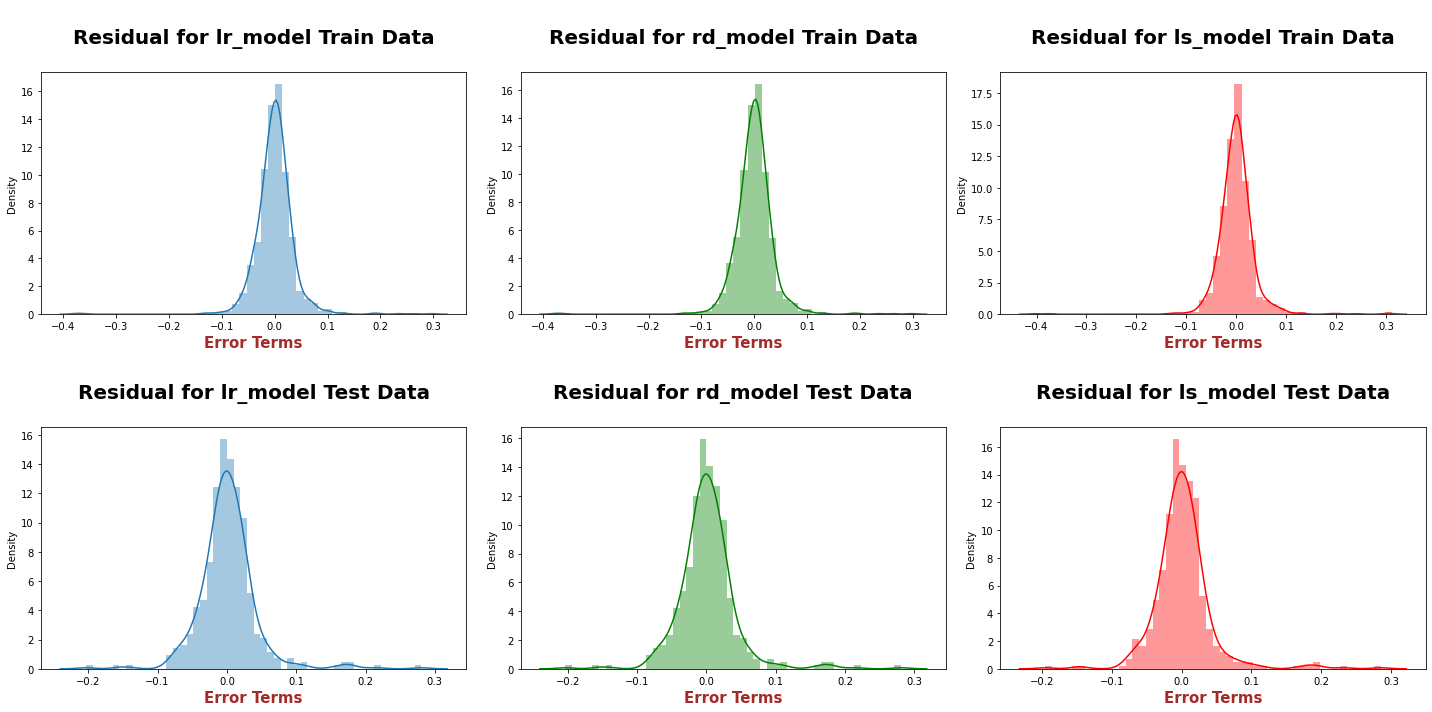

In [72]:
#calculate the residuals for predicted y and original y_train datapoints
lr_res_trn = (y_train-y_pred_train)
rd_res_trn = (y_train-y_rd_pred_train)
ls_res_trn = (y_train-y_ls_pred_train)

#calculate the residuals for predicted y test and original y_test datapoints
lr_res_tst = (y_test-y_pred_test)
rd_res_tst = (y_test-y_rd_pred_test)
ls_res_tst = (y_test-y_ls_pred_test)

#Figure size
plt.figure(figsize=(20,10))

#Let's plot all the residuals calculated for Train data
plt.subplot(2,3,1)
sns.distplot(lr_res_trn)
plt.title("\nResidual for lr_model Train Data\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("Error Terms", fontdict={'fontsize': 15, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.subplot(2,3,2)
sns.distplot(rd_res_trn,color ='g')
plt.title("\nResidual for rd_model Train Data\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("Error Terms", fontdict={'fontsize': 15, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.subplot(2,3,3)
sns.distplot(ls_res_trn,color ='r')
plt.title("\nResidual for ls_model Train Data\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("Error Terms", fontdict={'fontsize': 15, 'fontweight' : 'bold', 'color' : 'Brown'})

#Let's plot all the residuals calculated for Test Data
plt.subplot(2,3,4)
sns.distplot(lr_res_tst)
plt.title("\nResidual for lr_model Test Data\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("Error Terms", fontdict={'fontsize': 15, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.subplot(2,3,5)
sns.distplot(rd_res_tst,color ='g')
plt.title("\nResidual for rd_model Test Data\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("Error Terms", fontdict={'fontsize': 15, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.subplot(2,3,6)
sns.distplot(ls_res_tst,color ='r')
plt.title("\nResidual for ls_model Test Data\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("Error Terms", fontdict={'fontsize': 15, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.tight_layout()
plt.show()

<b>Inference: </b>Residuals for all three models are normally distributed

<b>Residuals/Error terms independent of each other & Error terms have constant variance</b>

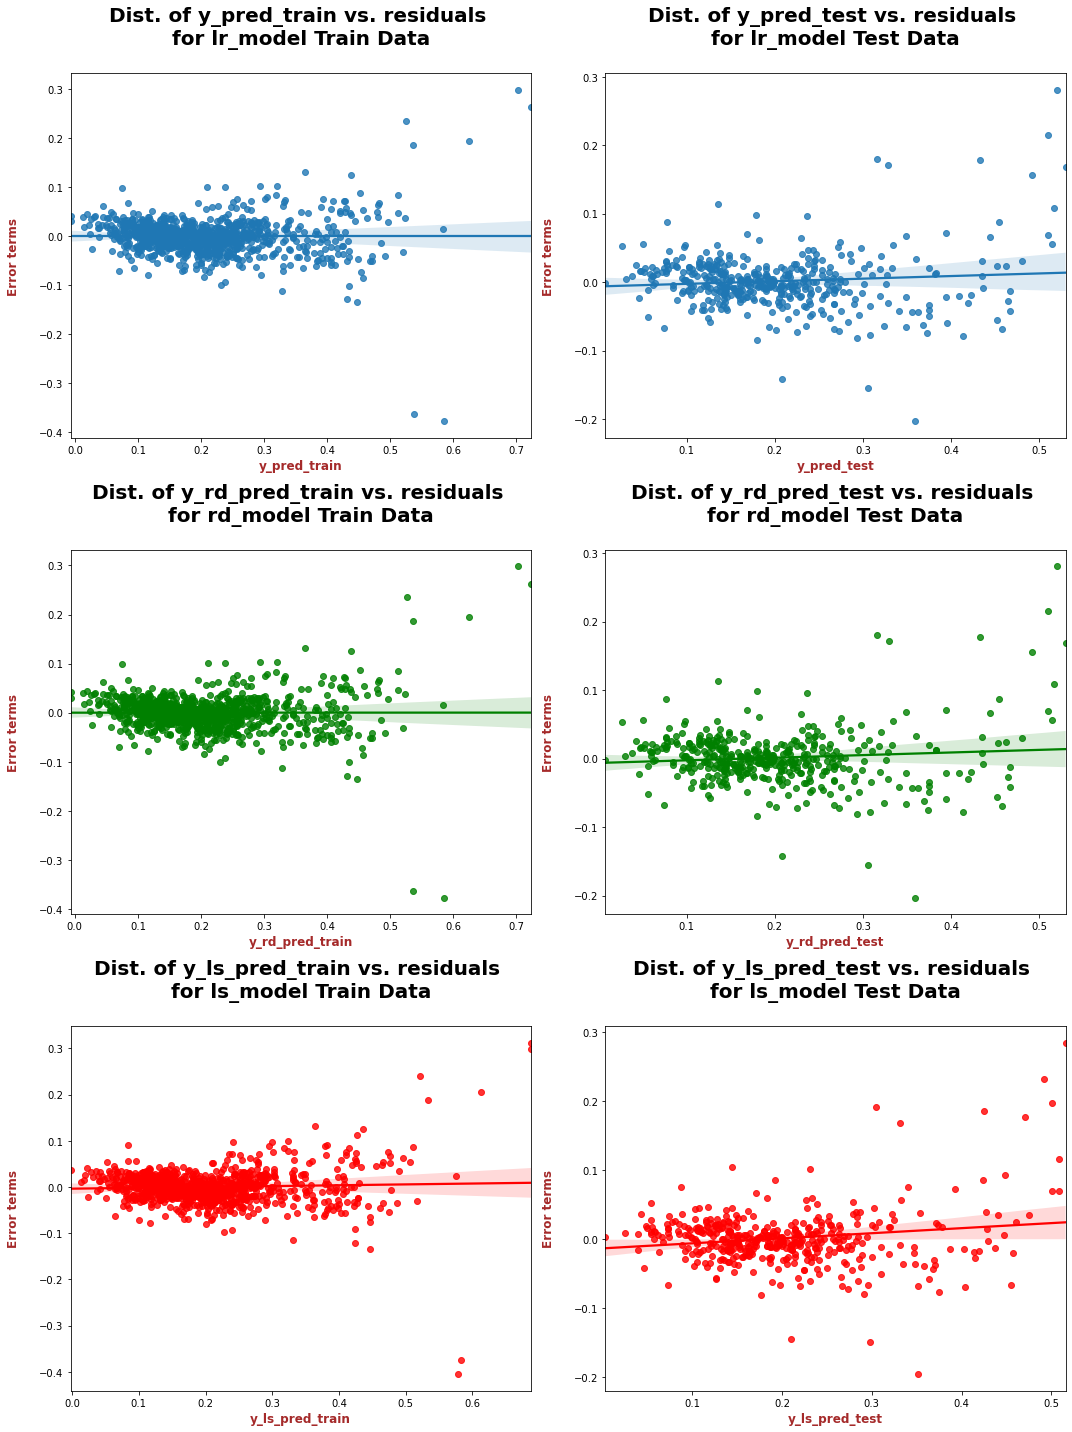

In [73]:
#Figure size
plt.figure(figsize=(15,20))

#let's plot a scatter plot of residuals against predicted y_train
plt.subplot(3,2,1)
sns.regplot(y_pred_train,lr_res_trn)
plt.title("Dist. of y_pred_train vs. residuals \nfor lr_model Train Data\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("y_pred_train", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("Error terms\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.subplot(3,2,3)
sns.regplot(y_rd_pred_train,rd_res_trn,color = 'g')
plt.title("Dist. of y_rd_pred_train vs. residuals \nfor rd_model Train Data\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("y_rd_pred_train", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("Error terms\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.subplot(3,2,5)
sns.regplot(y_ls_pred_train,ls_res_trn,color = 'r')
plt.title("Dist. of y_ls_pred_train vs. residuals \nfor ls_model Train Data\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("y_ls_pred_train", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("Error terms\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

#let's plot a scatter plot of residuals against predicted y_test
plt.subplot(3,2,2)
sns.regplot(y_pred_test,lr_res_tst)
plt.title("Dist. of y_pred_test vs. residuals \nfor lr_model Test Data\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("y_pred_test", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("Error terms\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.subplot(3,2,4)
sns.regplot(y_rd_pred_test,rd_res_tst,color = 'g')
plt.title("Dist. of y_rd_pred_test vs. residuals \nfor rd_model Test Data\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("y_rd_pred_test", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("Error terms\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.subplot(3,2,6)
sns.regplot(y_ls_pred_test,ls_res_tst,color = 'r')
plt.title("Dist. of y_ls_pred_test vs. residuals \nfor ls_model Test Data\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("y_ls_pred_test", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("Error terms\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.tight_layout()
plt.show()

<b>Inference: </b>
1. From all three scatter plots of train data, it is evident that the error points are independent of each other as there is no notable pattern observed
2. From all the three scatter plots of train data, it is evident that the error points are distributed around 0 with a few outliers which can be compromised
3. It is evident that even for test data the residuals are pretty randomely spread out around 0
4. From the above inferences it can be concluded that data transformation would not be required

<b>2. Model Prediction</b>

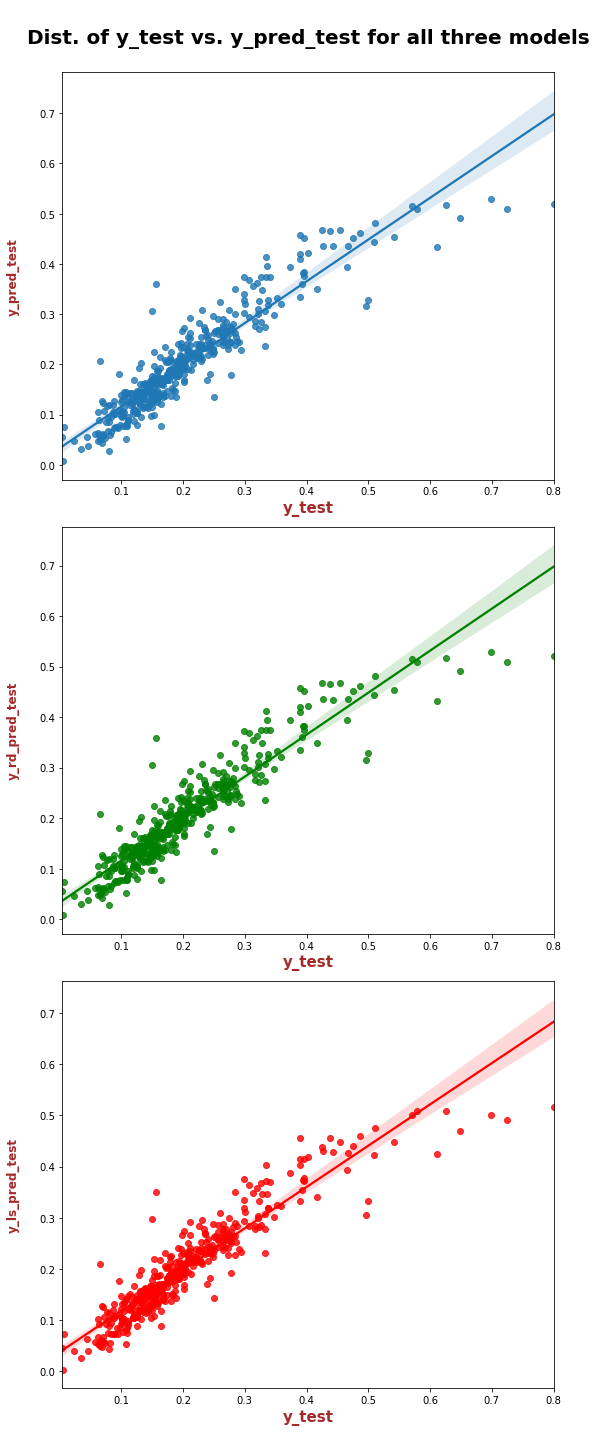

In [74]:
#Figure size
plt.figure(figsize=(8,20))

#let's plot a scatter plot of residuals against predicted y_train
plt.subplot(3,1,1)
sns.regplot(y_test,y_pred_test)
plt.title("\nDist. of y_test vs. y_pred_test for all three models\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("y_test", fontdict={'fontsize': 15, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("y_pred_test\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.subplot(3,1,2)
sns.regplot(y_test,y_rd_pred_test,color = 'g')
plt.xlabel("y_test", fontdict={'fontsize': 15, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("y_rd_pred_test\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.subplot(3,1,3)
sns.regplot(y_test,y_ls_pred_test,color = 'r')
plt.xlabel("y_test", fontdict={'fontsize': 15, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("y_ls_pred_test\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.tight_layout()
plt.show()

## Conclusion

In [75]:
#Find difference of trains and test r2 scores for all three models
diff_lr = round((final_metric['Linear Regression'][0] - final_metric['Linear Regression'][1]),4)
diff_rd = round((final_metric['Ridge Regression'][0] - final_metric['Ridge Regression'][1]),4)
diff_ls = round((final_metric['Lasso Regression'][0] - final_metric['Lasso Regression'][1]),4)

#Print the difference
print(diff_lr,diff_rd,diff_ls)

0.0209 0.021 0.0174


Clearly (diff_lr = diff_rd) > diff_ls . Hence let's utilise Lasso Regression's features for interpretting the significance of price of a house

Following are the top 10 features that affect the Sale Price of a property as per the performance of best model on train and test data:

In [76]:
betas.Lasso.sort_values(ascending = False,key=abs).head(10)

GrLivArea               0.321224
OverallQual             0.131369
Neighborhood_NoRidge    0.077061
LotArea                 0.075901
YearBuilt               0.070525
GarageCars              0.065813
BsmtFinType1_None      -0.057548
OverallCond             0.056942
BsmtQual_Gd            -0.047278
BsmtQual_TA            -0.046677
Name: Lasso, dtype: float64

As per the Lasso regression model - ls_model, the equation of the best fit line on train and test data can be defined by the following equation:

$ SalePrice = 0.32  \times  GrLivArea + 0.13  \times OverallQual + 0.077 \times Neighborhood\_NoRidge + 0.075 \times LotArea - 0.070 \times YearBuilt + 0.065 \times GarageCars -0.057 \times BsmtFinType1\_None + 0.056 \times OverallCond - 0.047 \times BsmtQual\_Gd - 0.046 \times BsmtQual\_TA -0.048 $

In [77]:
###############################################################################################################################

In [78]:
###############################################################################################################################

End of Part 1 Analysis

In [79]:
###############################################################################################################################

In [80]:
###############################################################################################################################

## Subjective Questions

1. <b>What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?</b>

For the features selected post feature elimination, the alpha values are as follows:
* The optimal value of alpha for Ridge Regression is 0.01 
* The optimal value of alpha for Lasso Regression is 0.0001 

If the above values of alpha are doubled, then alpha value for Ridge and Lasso will be as follows:
* Ridge Regression alpha is 0.02
* Ridge Regression alpha is 0.0002

With the above alpha values let's rebuild the model to understand the changes caused by doubling the alpha values

<b>A. Ridge Regression with alpha = 0.02:</b>

In [81]:
#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised
alpha = 0.02
ridge2 = Ridge(alpha=alpha)
#Fit the redge regression on the train data
ridge2.fit(X_train_bfe1, y_train)
#Predict the values for variables in Train and test set
y_rd2_pred_train = ridge2.predict(X_train_bfe1)
y_rd2_pred_test = ridge2.predict(X_test_bfe1)
# Lets calculate some metrics such as R2 score, RSS,MSE and RMSE
rd2_metrics = get_metrics(y_train,y_rd2_pred_train,y_test,y_rd2_pred_test)

R2 score for train data 0.8821070173973494
R2 score for test data 0.8610658421079455
RSS for train data 1.450939714272603
RSS for test data 0.7571001404237019
MSE for train data 0.0014210966839104829
MSE for test data 0.001724601686614355
RMSE for train data 0.03769743603894677
RMSE for test data 0.041528323908079354


<b>B. Lasso Regression with alpha = 0.0002:

In [82]:
#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised
alpha = 0.0002
lasso2 = Lasso(alpha=alpha)
#Fit the lasso regression model on the train data
lasso2.fit(X_train_bfe1, y_train)
#Predict the values against test and train dataset
y_ls2_pred_train = lasso2.predict(X_train_bfe1)
y_ls2_pred_test = lasso2.predict(X_test_bfe1)
# Lets calculate some metrics such as R2 score, RSS and RMSE
ls2_metrics = get_metrics(y_train,y_ls2_pred_train,y_test,y_ls2_pred_test)

R2 score for train data 0.8718846914669619
R2 score for test data 0.8565843958509313
RSS for train data 1.5767485481590775
RSS for test data 0.7815210865896032
MSE for train data 0.0015443178728296548
MSE for test data 0.0017802302655799617
RMSE for train data 0.03929781002587364
RMSE for test data 0.04219277504004639


Let's tabulate the metrics and the coefficients to compare the changes post doubling the alpha

In [83]:
# Creating a table which contain all the metrics
rd_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (Test)'], 'Ridge Regression': rd_metrics}

#Create DF and Series to be concatenated
rd1_metric = pd.DataFrame(rd_table ,columns = ['Metric', 'Ridge Regression'] )
rd2_metric = pd.Series(rd2_metrics, name = 'Ridge Regression Double')
ls1_metric = pd.Series(ls_metrics, name = 'Lasso Regression')
ls2_metric = pd.Series(ls2_metrics, name = 'Lasso Regression Double')

#Concatenate the above information in 1 table
final_metric2 = pd.concat([rd1_metric, rd2_metric, ls1_metric,ls2_metric], axis = 1)

final_metric2

,Metric,Ridge Regression,Ridge Regression Double,Lasso Regression,Lasso Regression Double
0,R2 Score (Train),0.882109,0.882107,0.878756,0.871885
1,R2 Score (Test),0.861113,0.861066,0.861316,0.856584
2,RSS (Train),1.450919,1.450940,1.492180,1.576749
3,RSS (Test),0.756842,0.757100,0.755735,0.781521
4,MSE (Train),0.001421,0.001421,0.001461,0.001544
5,MSE (Test),0.001724,0.001725,0.001721,0.001780
6,RMSE (Train),0.037697,0.037697,0.038229,0.039298
7,RMSE (Test),0.041521,0.041528,0.041491,0.042193


Let's look at the error between train and test prediction in terms of R2 score

In [84]:
#Difference between r2 score of train and test data
diff_rd2 = round((final_metric2['Ridge Regression Double'][0] - final_metric2['Ridge Regression Double'][1]),4)
diff_ls2 = round((final_metric2['Lasso Regression Double'][0] - final_metric2['Lasso Regression Double'][1]),4)

#Print the difference
print('Difference in R2 score before doubling the alpha value for Ridge Regression is',diff_rd,'& for Lasso Regression is',diff_ls)
print('Difference in R2 score after doubling the alpha value for Ridge Regression is',diff_rd2,'& for Lasso Regression is',diff_ls2)

Difference in R2 score before doubling the alpha value for Ridge Regression is 0.021 & for Lasso Regression is 0.0174
Difference in R2 score after doubling the alpha value for Ridge Regression is 0.021 & for Lasso Regression is 0.0153


Let's look at the coefficients in a tabular form to observe if there are any changes:

In [85]:
betas2 = pd.DataFrame(index=X_train_bfe1.columns)

betas2['Ridge1'] = ridge.coef_
betas2['Lasso1'] = lasso.coef_
betas2['Ridge2'] = ridge2.coef_
betas2['Lasso2'] = lasso2.coef_

betas2.sort_values(by=['Lasso2','Lasso1','Ridge2','Ridge1'],ascending=False,key=abs)

,Ridge1,Lasso1,Ridge2,Lasso2
GrLivArea,0.329090,0.321224,0.327667,0.319414
OverallQual,0.118785,0.131369,0.118968,0.143914
Neighborhood_NoRidge,0.080979,0.077061,0.080988,0.075941
YearBuilt,0.075022,0.070525,0.074897,0.067402
GarageCars,0.072520,0.065813,0.072546,0.061228
OverallCond,0.064909,0.056942,0.064824,0.048838
BsmtFinType1_None,-0.067327,-0.057548,-0.067321,-0.048216
KitchenQual_TA,-0.048075,-0.046614,-0.048133,-0.045148
Neighborhood_NridgHt,0.048600,0.046021,0.048570,0.044305
BsmtQual_Gd,-0.052941,-0.047278,-0.052944,-0.041587


<b>Inference:</b>

The error in train and test prediction accuracy in terms of r2 and other metrics have not changed much for ridge regression but has reduced for Lasso Regression as lasso has performed 1 feature elimination
The coefficients are also pretty similar in both the models except for the fact that Laoo has went ahead and eliminated a feature called 'LotFrontage'

2. <b>After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?</b>

In [86]:
#prepare the train and test dataframe without the top 5 important predictors identified
X_train_bfe2 = X_train_bfe1.drop(betas.sort_values(by=['Lasso'],ascending = False,key=abs).head(5).index,1)
#Prepare the test dataframe to have the same columns as train
X_test_bfe2 = X_test[X_train_bfe2.columns.tolist()]

In [87]:
#Instantiate Lasso regression
lasso = Lasso()

# cross validation with same alpha params as ridge
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

#Fit a model prepared on the above mentioned cv
model_cv.fit(X_train_bfe2, y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 0.0001}


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


In [88]:
#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised
alpha = 0.0001
lasso3 = Lasso(alpha=alpha)
#Fit the lasso regression model on the train data
lasso3.fit(X_train_bfe2, y_train)
#Predict the values against test and train dataset
y_ls3_pred_train = lasso3.predict(X_train_bfe2)
y_ls3_pred_test = lasso3.predict(X_test_bfe2)
# Lets calculate some metrics such as R2 score, RSS and RMSE
ls3_metrics = get_metrics(y_train,y_ls3_pred_train,y_test,y_ls3_pred_test)

R2 score for train data 0.8129398495549782
R2 score for test data 0.8046528679609467
RSS for train data 2.3021981058301586
RSS for test data 1.0645138916309127
MSE for train data 0.0022548463328405078
MSE for test data 0.002424860800981578
RMSE for train data 0.0474852222574614
RMSE for test data 0.049242875636802304


In [89]:
#Present the data in a dataframe format
betas3 = pd.DataFrame(index=X_train_bfe2.columns)
betas3['Lasso Backup'] = lasso3.coef_

#get top 5 contenders
betas3.sort_values(by=['Lasso Backup'],ascending=False,key=abs).head(5)

,Lasso Backup
2ndFlrSF,0.191963
GarageCars,0.123645
BsmtFinType1_None,-0.115983
BsmtQual_Fa,-0.094044
FullBath,0.093097
